<img src="https://uwe-cyber.github.io/images/uwe_banner.png">

# UFCFEL-15-3 Security Data Analytics and Visualisation
## Portfolio Assignment: Part 3
### Academic year: 2024-25

## Conduct a security investigation into a suspected insider threat
---

**UWEtech** are calling you back once more to help them with their security challenges. They believe that one of their employees has been the cause of their recent security problems, and they believe they may have an insider threat within the company. They enlist your help to examine employee log activity, to see what behaviours deviate from the norm and to identify which user may be acting as a threat to their organisation.

**Dataset:** You will be issued a **unique dataset** based on your UWE student ID. **Failure to use the dataset that corresponds to your student ID will result in zero marks.** Please access the datasets via Blackboard.

**This exercise carries a weight of 45% towards your overall portfolio submission**


### Submission Documents
---

For Part 3 of your portfolio, your complete output file should be saved as:

- **STUDENT_ID-PART3.ipynb**

This should then be included in a ZIP file along with your other two portfolio documents.

The deadline for your portfolio submission is **THURSDAY 12th DECEMBER @ 14:00**. 

## DATASET: Load in the data

**Please provide the string below that you have been assigned as given in the spreadsheet available on Blackboard. The directory containing your dataset should be at the same location as your notebook file.**

In [885]:
# PLEASE ENTER THE NAME OF THE DATASET ASSIGNED TO YOU AS INDICATED ON BLACKBOARD
DATASET = 'CyberWaveSolutions'

### Function for loading data - do not change

In [887]:
import random
import string
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

def load_data(DATASET):

    email_data = pd.read_csv('./' + DATASET + '/email_data.csv', parse_dates=True, index_col=0)
    file_data = pd.read_csv('./' + DATASET + '/file_data.csv', parse_dates=True, index_col=0)
    web_data = pd.read_csv('./' + DATASET + '/web_data.csv', parse_dates=True, index_col=0)
    login_data = pd.read_csv('./' + DATASET + '/login_data.csv', parse_dates=True, index_col=0)
    usb_data = pd.read_csv('./' + DATASET + '/usb_data.csv', parse_dates=True, index_col=0)
    employee_data = pd.read_csv('./' + DATASET + '/employee_data.csv', index_col=0)
    
    email_data['datetime'] = pd.to_datetime(email_data['datetime'])
    file_data['datetime'] = pd.to_datetime(file_data['datetime'])
    web_data['datetime'] = pd.to_datetime(web_data['datetime'])
    login_data['datetime'] = pd.to_datetime(login_data['datetime'])
    usb_data['datetime'] = pd.to_datetime(usb_data['datetime'])

    return employee_data, login_data, usb_data, web_data, file_data, email_data

employee_data, login_data, usb_data, web_data, file_data, email_data = load_data(DATASET)

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_66996/781222510.py:10: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_66996/781222510.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_66996/781222510.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

/var/folders/r6/7ngrztcd43qdb1490gx4bsmh0000gn/T/ipykernel_66996/781222510.py:13: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To 

### The following code samples may be useful to aid your investigation

In [889]:
# This shows the employee_data DataFrame
employee_data

,user,role,email,pc
0,usr-esz,Security,usr-esz@cyberwave-solutions.com,pc0
1,usr-idp,Security,usr-idp@cyberwave-solutions.com,pc1
2,usr-pum,Security,usr-pum@cyberwave-solutions.com,pc2
3,usr-dpa,Services,usr-dpa@cyberwave-solutions.com,pc3
4,usr-mnt,Security,usr-mnt@cyberwave-solutions.com,pc4
...,...,...,...,...
95,usr-dnm,Security,usr-dnm@cyberwave-solutions.com,pc95
96,usr-rjr,HR,usr-rjr@cyberwave-solutions.com,pc96
97,usr-pkd,HR,usr-pkd@cyberwave-solutions.com,pc97
98,usr-kba,Finance,usr-kba@cyberwave-solutions.com,pc98


In [890]:
# This shows the login_data DataFrame
login_data

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
1,2018-01-01 01:29:51,usr-dnm,login,pc95
2,2018-01-01 01:32:20,usr-nxa,login,pc9
3,2018-01-01 01:41:58,usr-pum,login,pc2
4,2018-01-01 01:46:17,usr-gtn,login,pc52
...,...,...,...,...
36195,2018-06-30 23:10:54,usr-dnm,logoff,pc95
36196,2018-06-30 23:13:54,usr-ayg,logoff,pc28
36197,2018-06-30 23:39:37,usr-ywt,logoff,pc66
36198,2018-06-30 23:52:53,usr-tss,logoff,pc26


In [891]:
# This shows how to filter the login_data DataFrame by a particular username
login_data[login_data['user']=='usr-iea']

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [892]:
# This shows how to filter the login_data DataFrame by a particular set of usernames within a list
login_data[login_data['user'].isin(['usr-iea'])]

,datetime,user,action,pc
0,2018-01-01 00:21:56,usr-iea,login,pc63
176,2018-01-01 21:20:04,usr-iea,logoff,pc63
206,2018-01-02 01:41:59,usr-iea,login,pc63
388,2018-01-02 22:37:23,usr-iea,logoff,pc63
415,2018-01-03 02:38:55,usr-iea,login,pc63
...,...,...,...,...
35772,2018-06-28 21:09:50,usr-iea,logoff,pc63
35809,2018-06-29 02:06:00,usr-iea,login,pc63
35982,2018-06-29 21:26:24,usr-iea,logoff,pc63
36065,2018-06-30 08:34:54,usr-iea,login,pc63


In [893]:
# all_roles is an array/list of all job roles that are within our DataFrame
all_roles = employee_data['role'].unique()
all_roles

array(['Security', 'Services', 'HR', 'Finance', 'Legal', 'Director',
       'Technical'], dtype=object)

In [894]:
### This sample code helps to create two dictionary objects - user_set and user_set_emails - that group usernames and emails by job role.

user_set = {}
user_set_emails = {}
all_roles = employee_data['role'].unique()
for role in all_roles:
    user_set[role] = list(employee_data[employee_data['role'] == role]['user'].values)
    user_set_emails[role] = list(employee_data[employee_data['role'] == role]['email'].values)

In [895]:
# List all usernames that belong to the job role Finance
user_set['Finance']

['usr-kaa',
 'usr-lpx',
 'usr-xqz',
 'usr-lnl',
 'usr-ibv',
 'usr-ihi',
 'usr-vun',
 'usr-mgl',
 'usr-kbn',
 'usr-idz',
 'usr-snf',
 'usr-kba']

### Question 1: For all Finance staff members during the month of January, show the distribution of when users logon and logoff by hour using one or more Bar Charts, and report the most common login and logoff time for this role.

*Hint: Once you have filtered the data to only Finance staff in January, count the number of logons and logoffs that occur in each hour of the day.*

#### (1 mark)

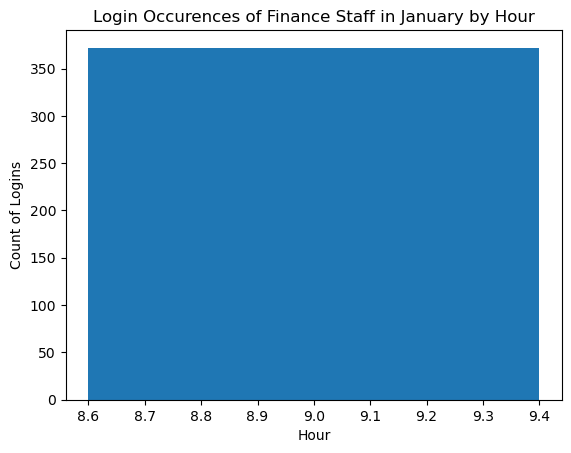

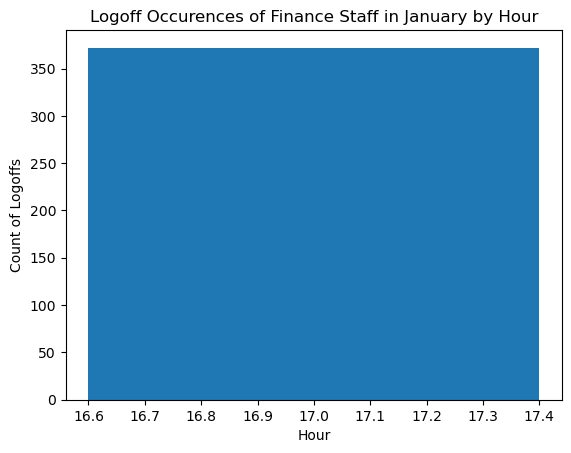

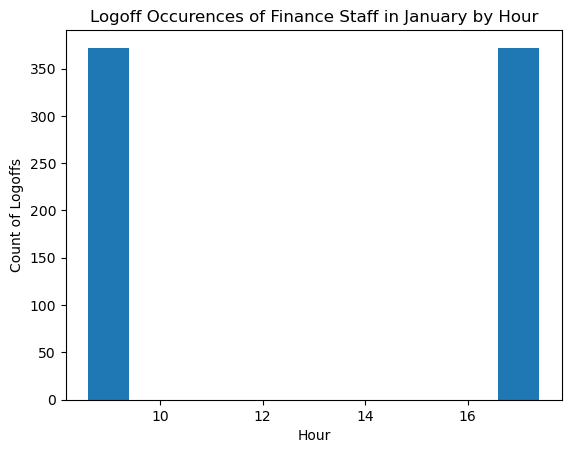

The time with the most frequent logins is: 9
The time with the most frequent logoffs is: 17
The time with the most frequent combination of login/logoff is: 9


In [897]:
######### ADD YOUR CODE HERE ##########
import numpy as np
#Split datetime into separate day and hour and month columns
januaryData = login_data.copy()
januaryData['hour'] = januaryData['datetime'].dt.hour
januaryData['month'] = januaryData['datetime'].dt.month

#Filter by month of january only
januaryData = januaryData[januaryData['month']==1]
#Filter by finance staff
januaryData = januaryData[januaryData['user'].isin(user_set['Finance'])]


#Group by hour and get login count and logoff count columns
loginData = januaryData[januaryData['action']=='login'].groupby('hour').count().reset_index()
logoffData = januaryData[januaryData['action']=='logoff'].groupby('hour').count().reset_index()
combinedLogoffLogin = januaryData.groupby('hour').count().reset_index()

#Bar chart that shows each hour and the log-on occurences
plt.bar(loginData['hour'], loginData['action'])
plt.title("Login Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.show()

#Bar chart that shows each hour and the log-off occurences
plt.bar(logoffData['hour'], logoffData['action'])
plt.title("Logoff Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logoffs")
plt.show()

#Bar chart that shows each hour with both log-on and log-off occurences combined
plt.bar(combinedLogoffLogin['hour'], combinedLogoffLogin['action'])
plt.title("Logoff Occurences of Finance Staff in January by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logoffs")
plt.show()

#Report the most common login and logoff time
mostFrequentLogin = loginData['hour'][loginData['action'].idxmax()]
mostFrequentLogoff = logoffData['hour'][logoffData['action'].idxmax()] 
mostFrequentLoginLogoff = combinedLogoffLogin['hour'][combinedLogoffLogin['action'].idxmax()] 
print("The time with the most frequent logins is:", mostFrequentLogin)
print("The time with the most frequent logoffs is:", mostFrequentLogoff)
print("The time with the most frequent combination of login/logoff is:", mostFrequentLoginLogoff)

### Question 2: Plot a multi-line chart that shows the logon and logoff times during the month of January for the user of pc42.

*Hint: Filter the data as you need, and make two calls to plt.plot().*

#### (1 mark)



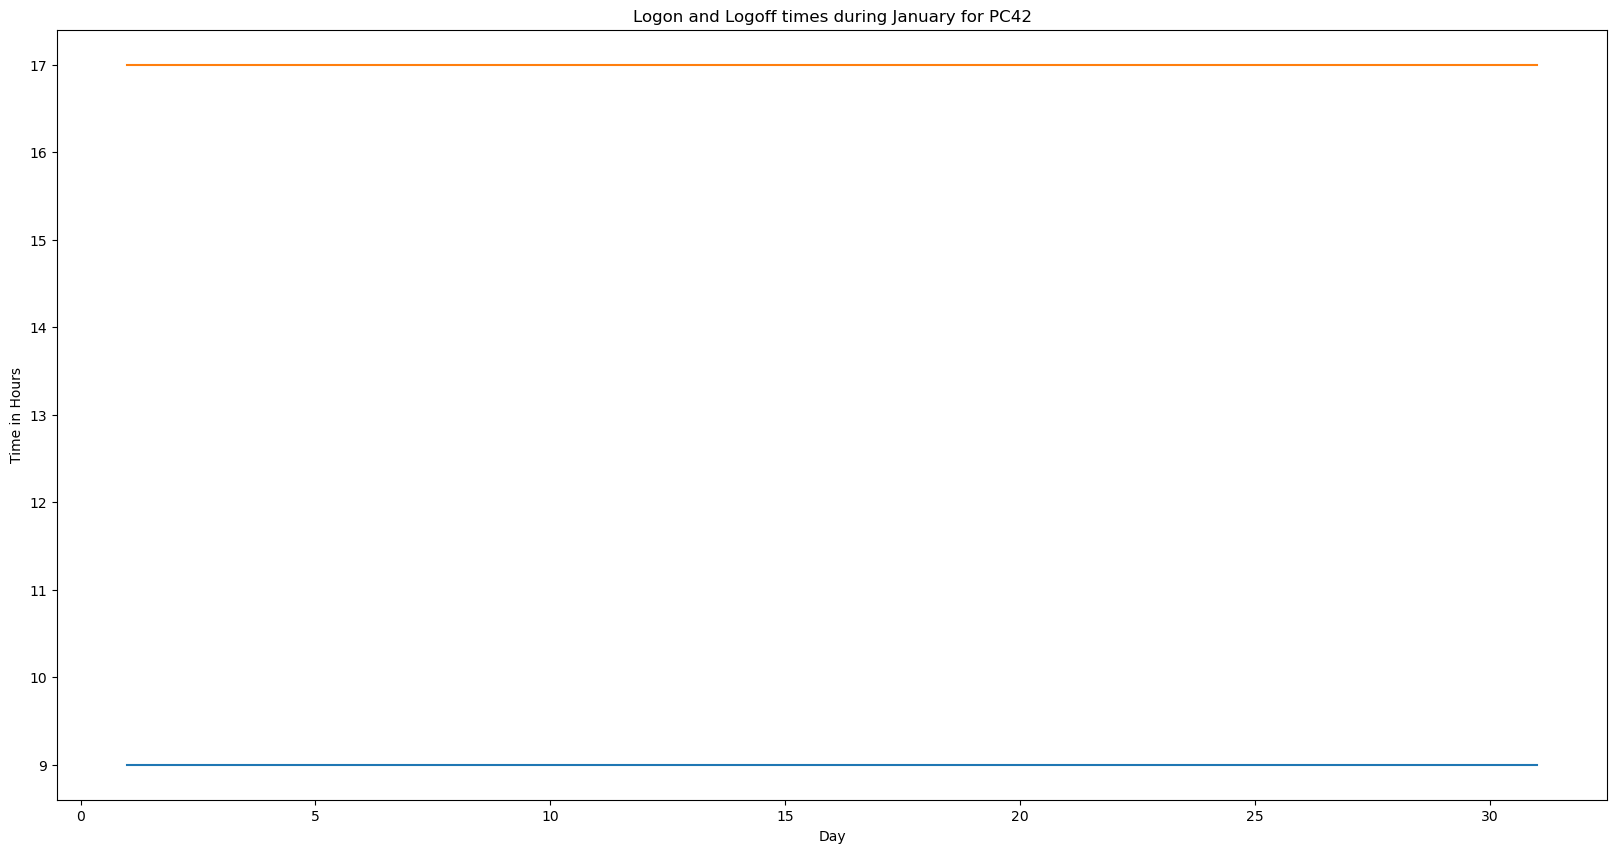

In [899]:
######### ADD YOUR CODE HERE ##########
#Filter data by pc42
onlyPC42 = login_data.copy()
onlyPC42['month'] = onlyPC42['datetime'].dt.month
onlyPC42['day'] = onlyPC42['datetime'].dt.day
onlyPC42['hour'] = onlyPC42['datetime'].dt.hour

onlyPC42 = onlyPC42[onlyPC42['pc']=='pc42']

#Filter by january
onlyPC42 = onlyPC42[onlyPC42['month']==1]

#Filter login and logoff respectively

onlyPC42Login = onlyPC42[onlyPC42['action']=='login']
onlyPC42Logoff = onlyPC42[onlyPC42['action']=='logoff']


plt.figure(figsize=(20,10))
#Plot log-on for pc42
plt.plot(onlyPC42Login['day'], onlyPC42Login['hour'], label="Login")
#Plot log-off for pc42
plt.plot(onlyPC42Logoff['day'], onlyPC42Logoff['hour'], label="Logoff")

plt.title("Logon and Logoff times during January for PC42")
plt.xlabel("Day")
plt.ylabel("Time in Hours")
plt.show()

### Question 3: Use a node-link graph to show all emails sent by Security staff on January 5th 2022. Your node link graph may show only those users who receive emails from the select senders.

*Hint: Filter the data and then refer back to Question 4 from Part 1 to format the data correctly*

#### (1 mark)

In [901]:
######### ADD YOUR CODE HERE ##########

### (Advanced) Question 4: Extend the above, now showing a node for every possible user. The edge connections should be as above, for emails sent by Security staff on 5th January 2022. You should use a shell layout for your network plot.

*Hint: Think about how to include all users as nodes. You may even include a dummy node and remove this in your processing depending on how you form your edgelist - https://networkx.org/documentation/stable/index.html*

#### (3 marks)

In [903]:
######### ADD YOUR CODE HERE ##########

### Question 5: Show a comparison between the files accessed by HR staff, Services staff, and Security staff, during January. You will need to think of a suitable way to convey this information within a single plot so that comparison of activity can be made easily.

*Hint: Think which plot enables you to make comparisons between two attributes, and then think what the attributes would need to be for mapping three job roles against the possible set of files accessed.*

#### (4 marks)

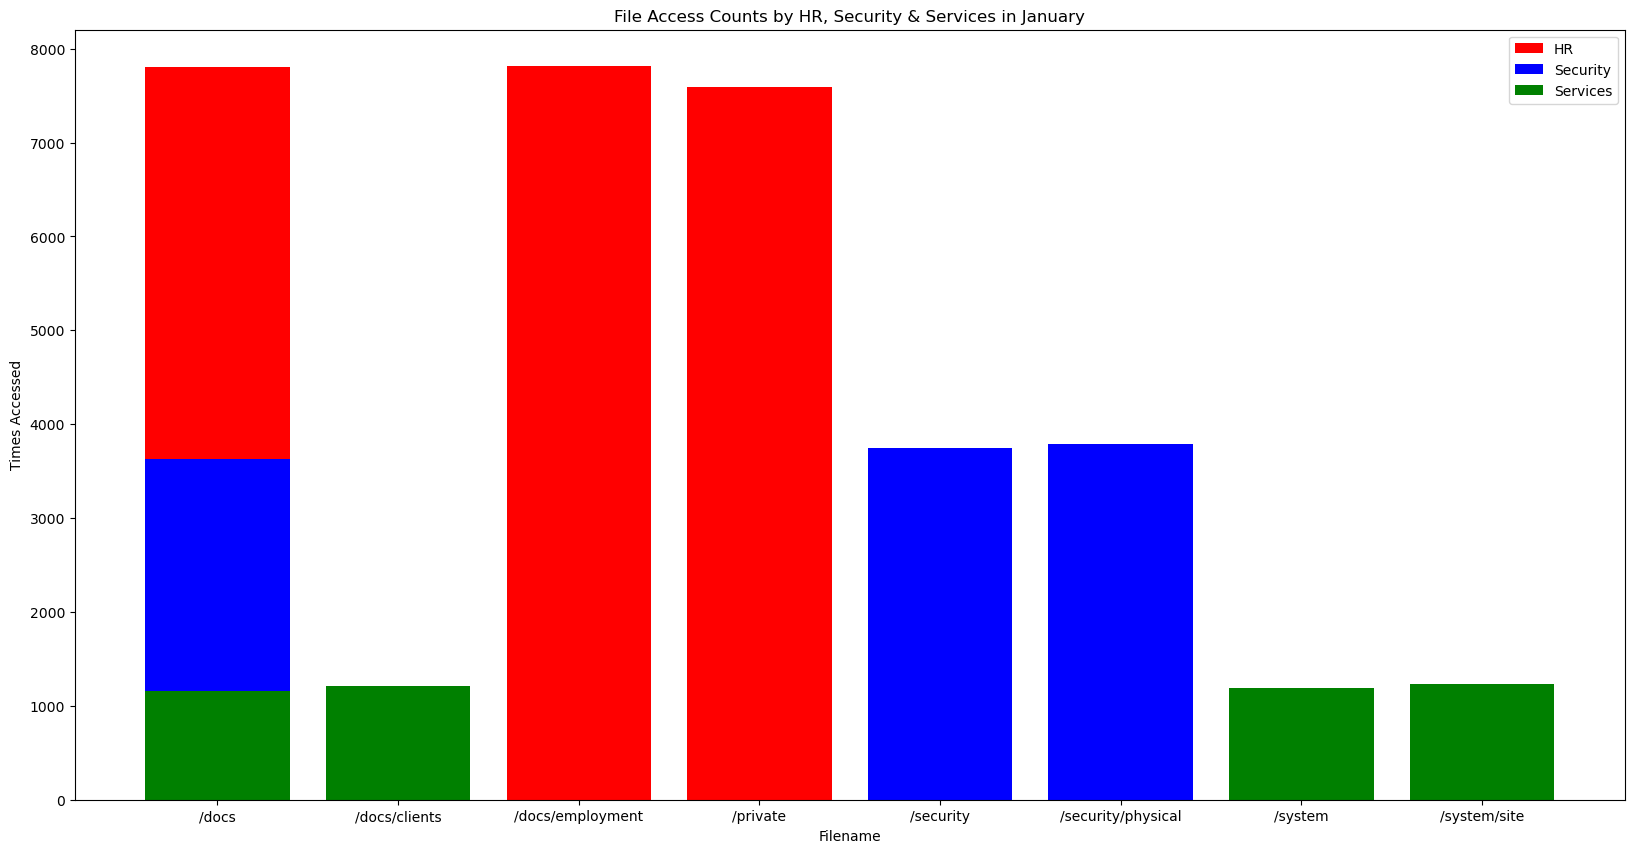

In [905]:
######### ADD YOUR CODE HERE ##########
#Filter file data by HR, Services and Security staff only
filteredFileData = file_data.copy()
combinedUserSet = user_set['HR'] + user_set['Services'] + user_set['Security']
filteredFileData = filteredFileData[filteredFileData['user'].isin(combinedUserSet)]

#Add the users role as a column
def getRole(user):
    if user in user_set['HR']:
        return 'HR'
    elif user in user_set['Services']:
        return 'Services'
    elif user in user_set['Security']:
        return 'Security'

#Apply getRole method
filteredFileData['role'] = filteredFileData['user'].apply(getRole)

#Filter file data by january
filteredFileData['month'] = filteredFileData['datetime'].dt.month
filteredFileData = filteredFileData[filteredFileData['month']==1]

#Get the count each role has accessed each file and add as column
filteredFileData = filteredFileData.groupby(['filename', 'role']).size().reset_index(name='timesaccessed')

#Filter by role
hrFileData= filteredFileData[filteredFileData['role'] == 'HR']
securityFileData = filteredFileData[filteredFileData['role'] == 'Security']
servicesFileData = filteredFileData[filteredFileData['role'] == 'Services']

#Get names of files accessed across all 3 roles
filenames = filteredFileData['filename'].unique()

#Reindex on all filenames filling those not accessed by a role with 0
#this is done so stacked bar chart can be plotted consistently if a role 
#hasn't accessed a file (e.g. /system is only accessed by services)
hrFileData = hrFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()
securityFileData = securityFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()
servicesFileData = servicesFileData.set_index('filename').reindex(filenames, fill_value=0)['timesaccessed'].reset_index()

#Plot stacked bar graph
plt.figure(figsize=(20,10))

#Plotting each bar with the label and colour
plt.bar(filenames, hrFileData['timesaccessed'], color='r', label='HR')
plt.bar(filenames, securityFileData['timesaccessed'], color='b', label='Security')
plt.bar(filenames, servicesFileData['timesaccessed'], color='g', label='Services')

plt.xlabel('Filename')
plt.ylabel('Times Accessed')
plt.title('File Access Counts by HR, Security & Services in January')
plt.legend()
plt.show()

### Question 6: Carry on your own investigation to find the anomalous activity across all data files provided. Provide clear evidence and justification for your investigative steps.

Marks are awarded for: 
- a clear explanation of the steps you take to complete your investigation (5)
- suitable use of data analysis with clear explanation (6)
- suitable use of visualisation methods with clear annotation (6)
- identifying all of the suspicious events (8)

#### (25 marks)

In [907]:
######### ADD YOUR CODE HERE ##########

In [908]:
employee_data, login_data, usb_data, web_data, file_data, email_data

(       user       role                            email    pc
 0   usr-esz   Security  usr-esz@cyberwave-solutions.com   pc0
 1   usr-idp   Security  usr-idp@cyberwave-solutions.com   pc1
 2   usr-pum   Security  usr-pum@cyberwave-solutions.com   pc2
 3   usr-dpa   Services  usr-dpa@cyberwave-solutions.com   pc3
 4   usr-mnt   Security  usr-mnt@cyberwave-solutions.com   pc4
 ..      ...        ...                              ...   ...
 95  usr-dnm   Security  usr-dnm@cyberwave-solutions.com  pc95
 96  usr-rjr         HR  usr-rjr@cyberwave-solutions.com  pc96
 97  usr-pkd         HR  usr-pkd@cyberwave-solutions.com  pc97
 98  usr-kba    Finance  usr-kba@cyberwave-solutions.com  pc98
 99  usr-jxt  Technical  usr-jxt@cyberwave-solutions.com  pc99
 
 [100 rows x 4 columns],
                  datetime     user  action    pc
 0     2018-01-01 00:21:56  usr-iea   login  pc63
 1     2018-01-01 01:29:51  usr-dnm   login  pc95
 2     2018-01-01 01:32:20  usr-nxa   login   pc9
 3     2018-01-01

<strong>Pre-Processing</strong>

To begin a thorough investigation I would first like to perform some pre-processing on the data, for the first step in this I will check for and handle any missing values and duplicate values. My reasoning for this is to ensure the data is free of noise and accurate, it also helps when visualising data as it removes the potential for gaps in visualisations.

user     0
role     0
email    0
pc       0
dtype: int64
datetime    0
user        0
action      0
pc          0
dtype: int64
datetime    0
user        0
action      0
pc          0
dtype: int64
datetime    0
user        0
website     0
dtype: int64
datetime    0
user        0
filename    0
dtype: int64
datetime     0
sender       0
recipient    0
dtype: int64


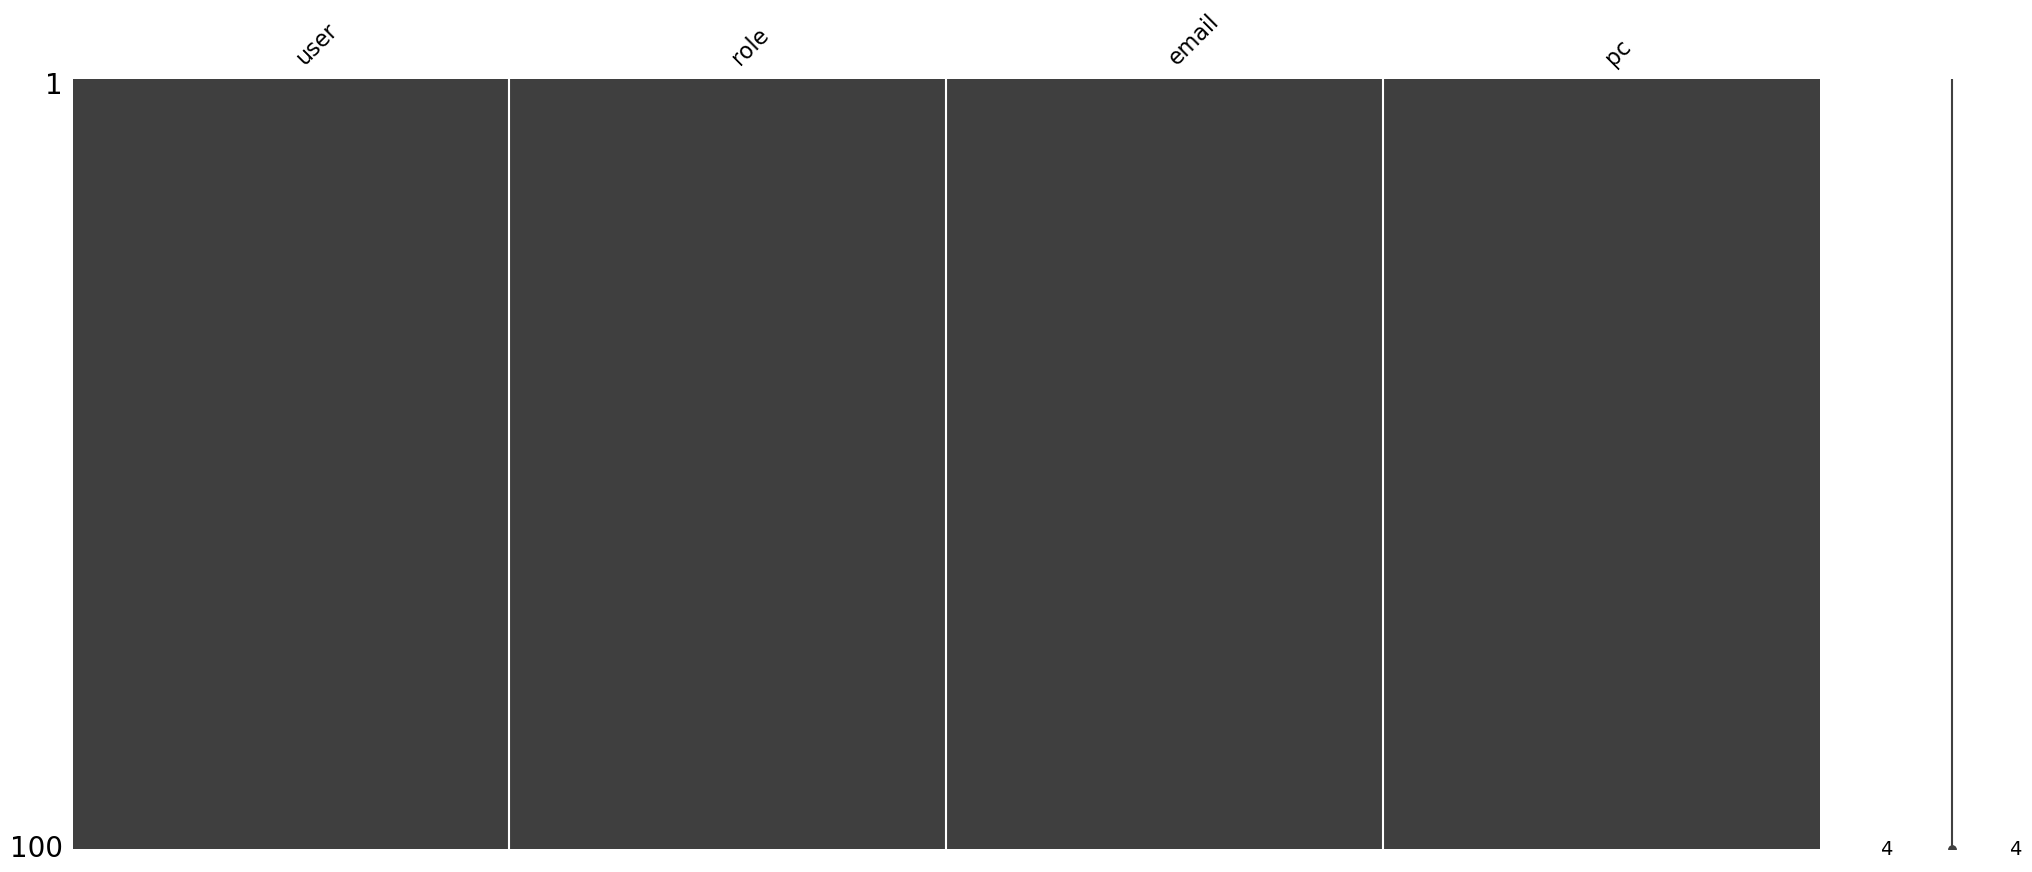

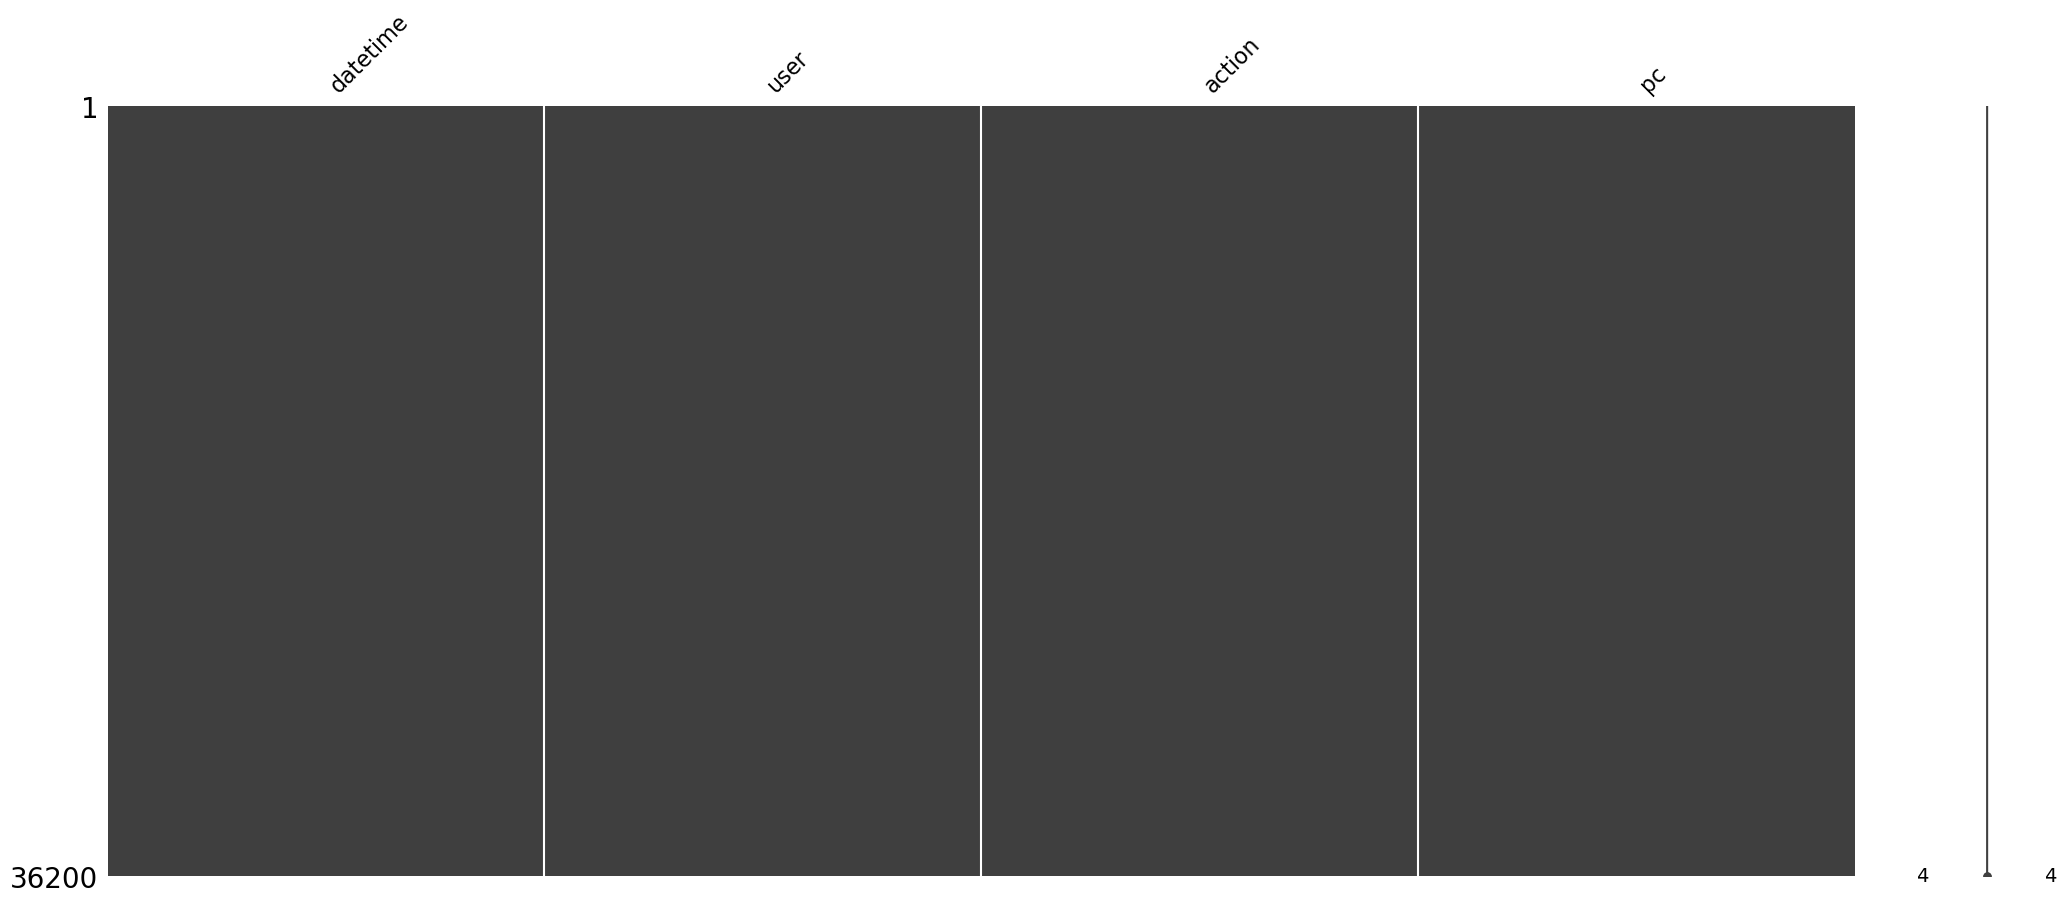

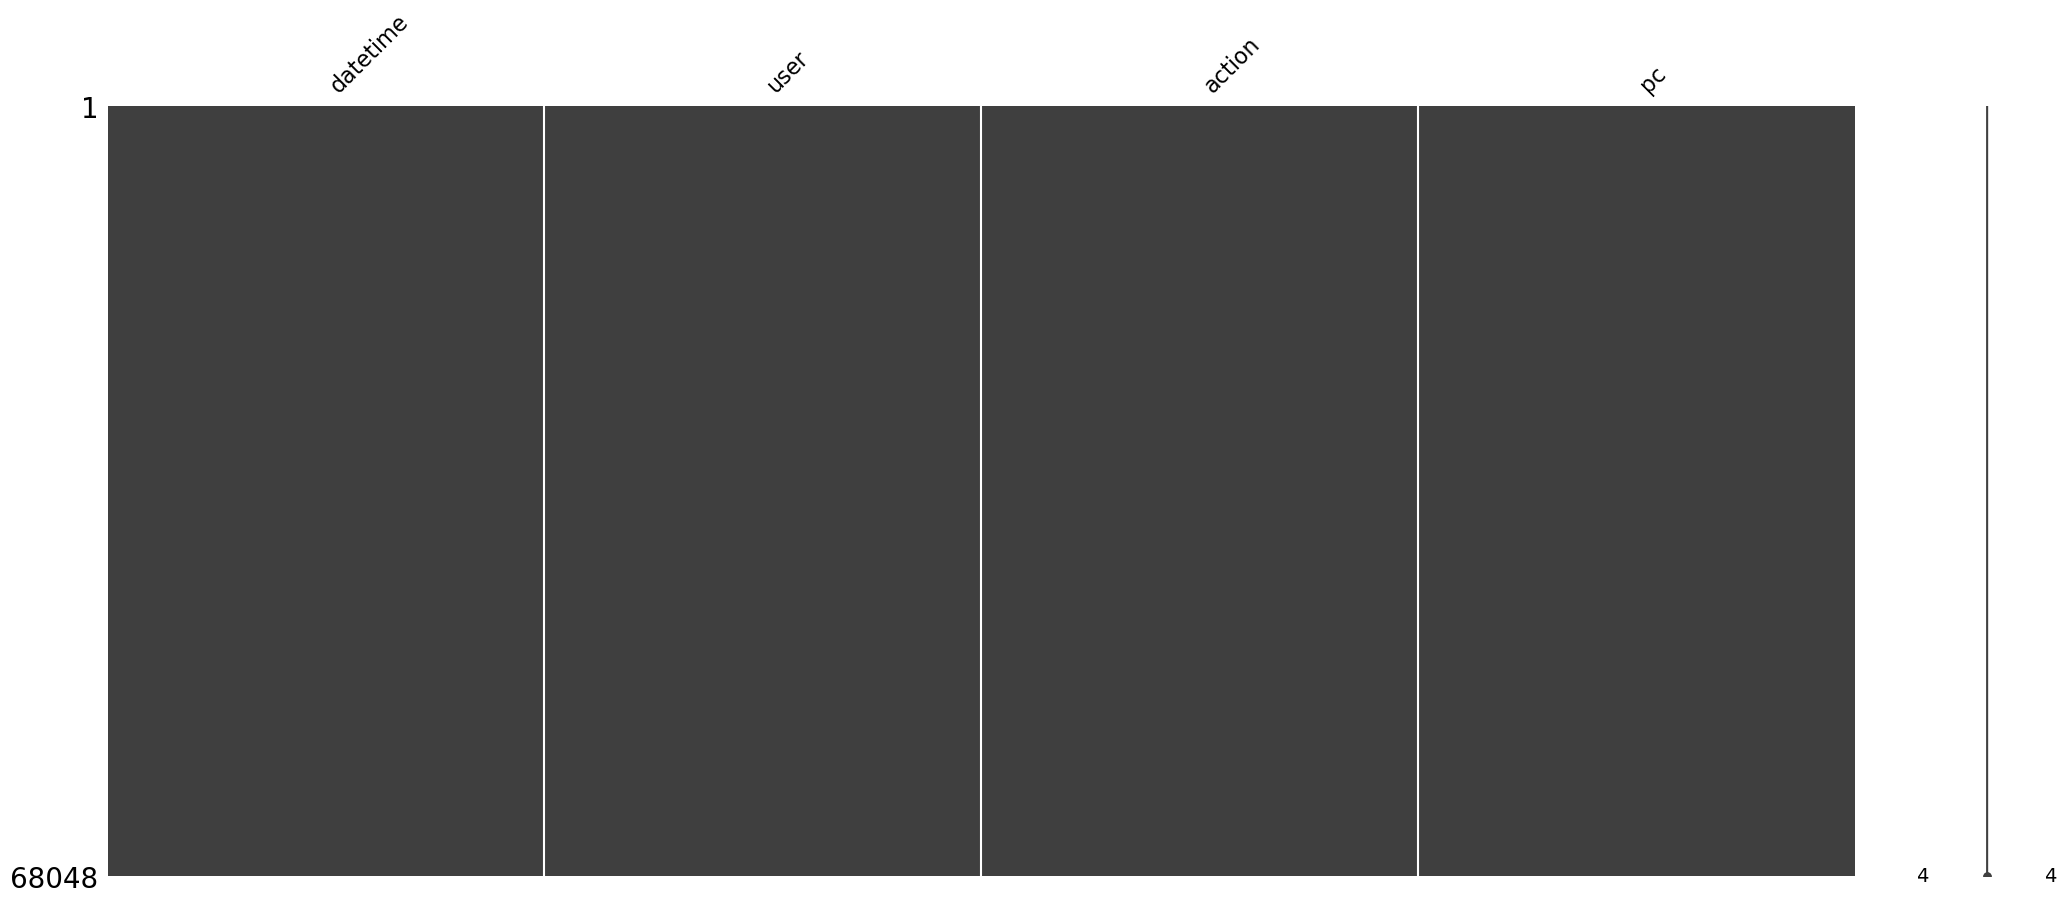

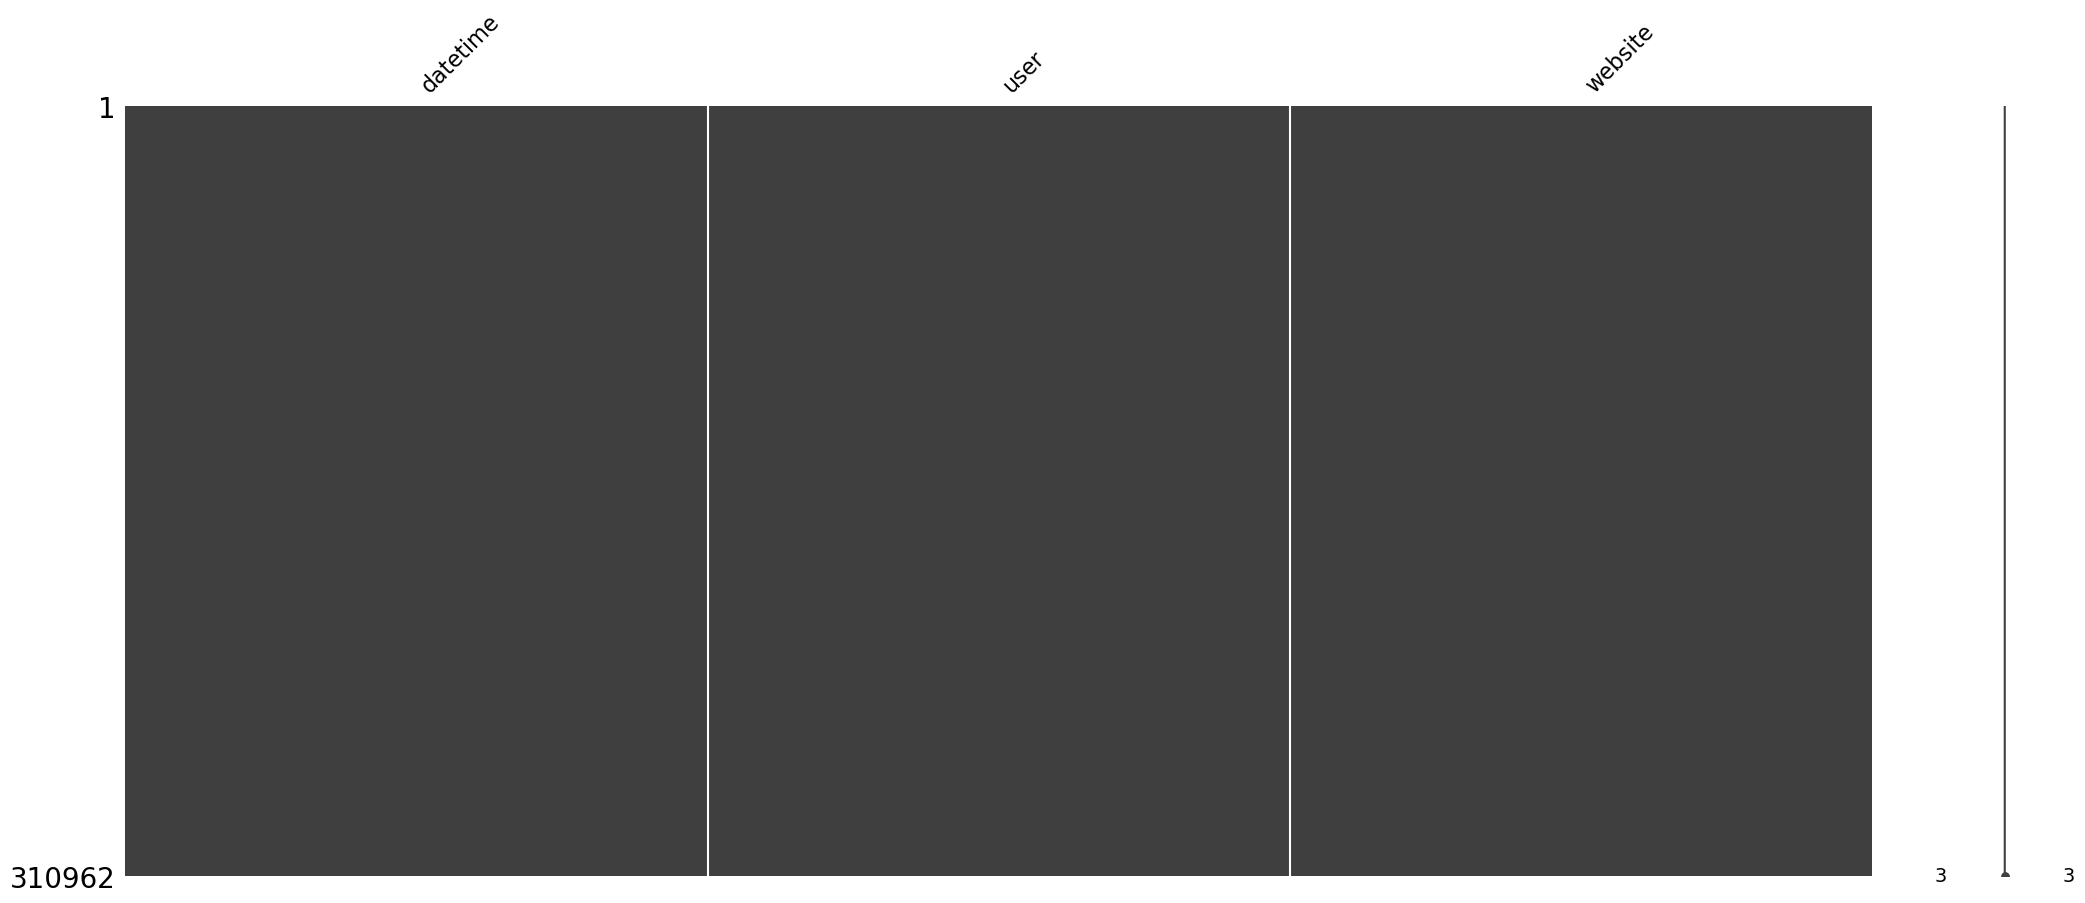

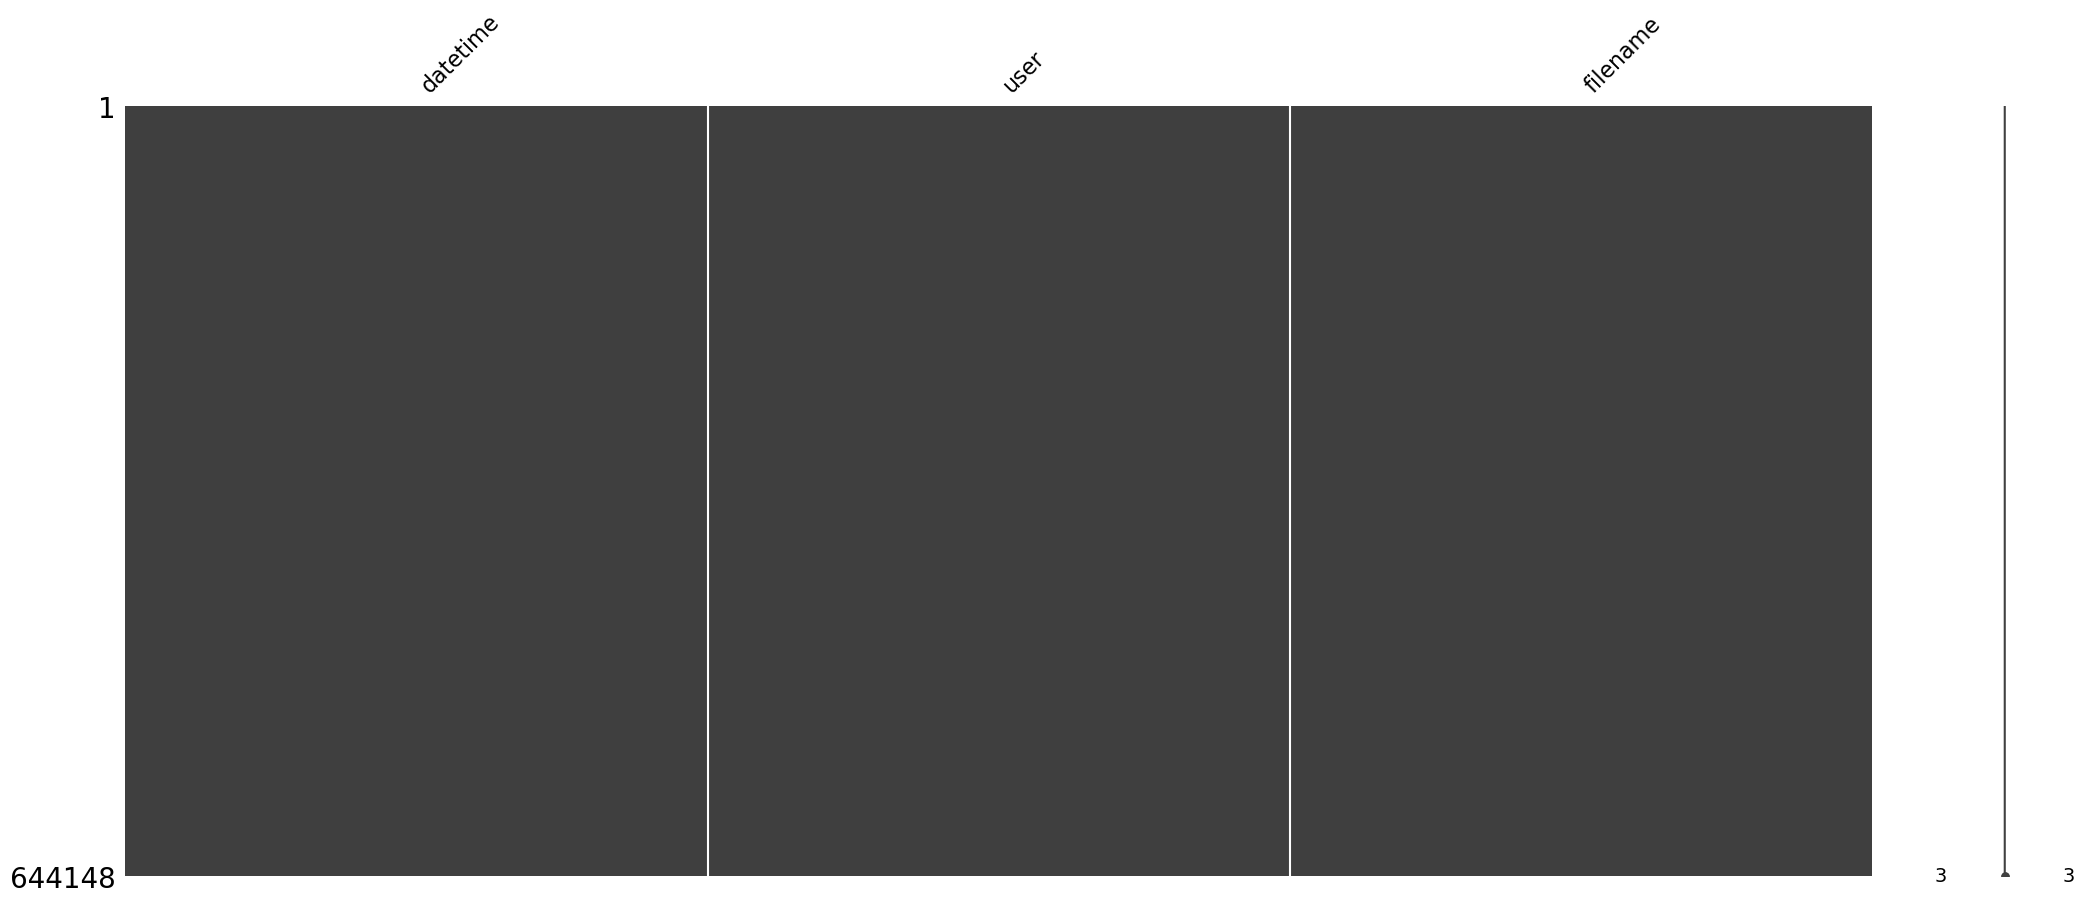

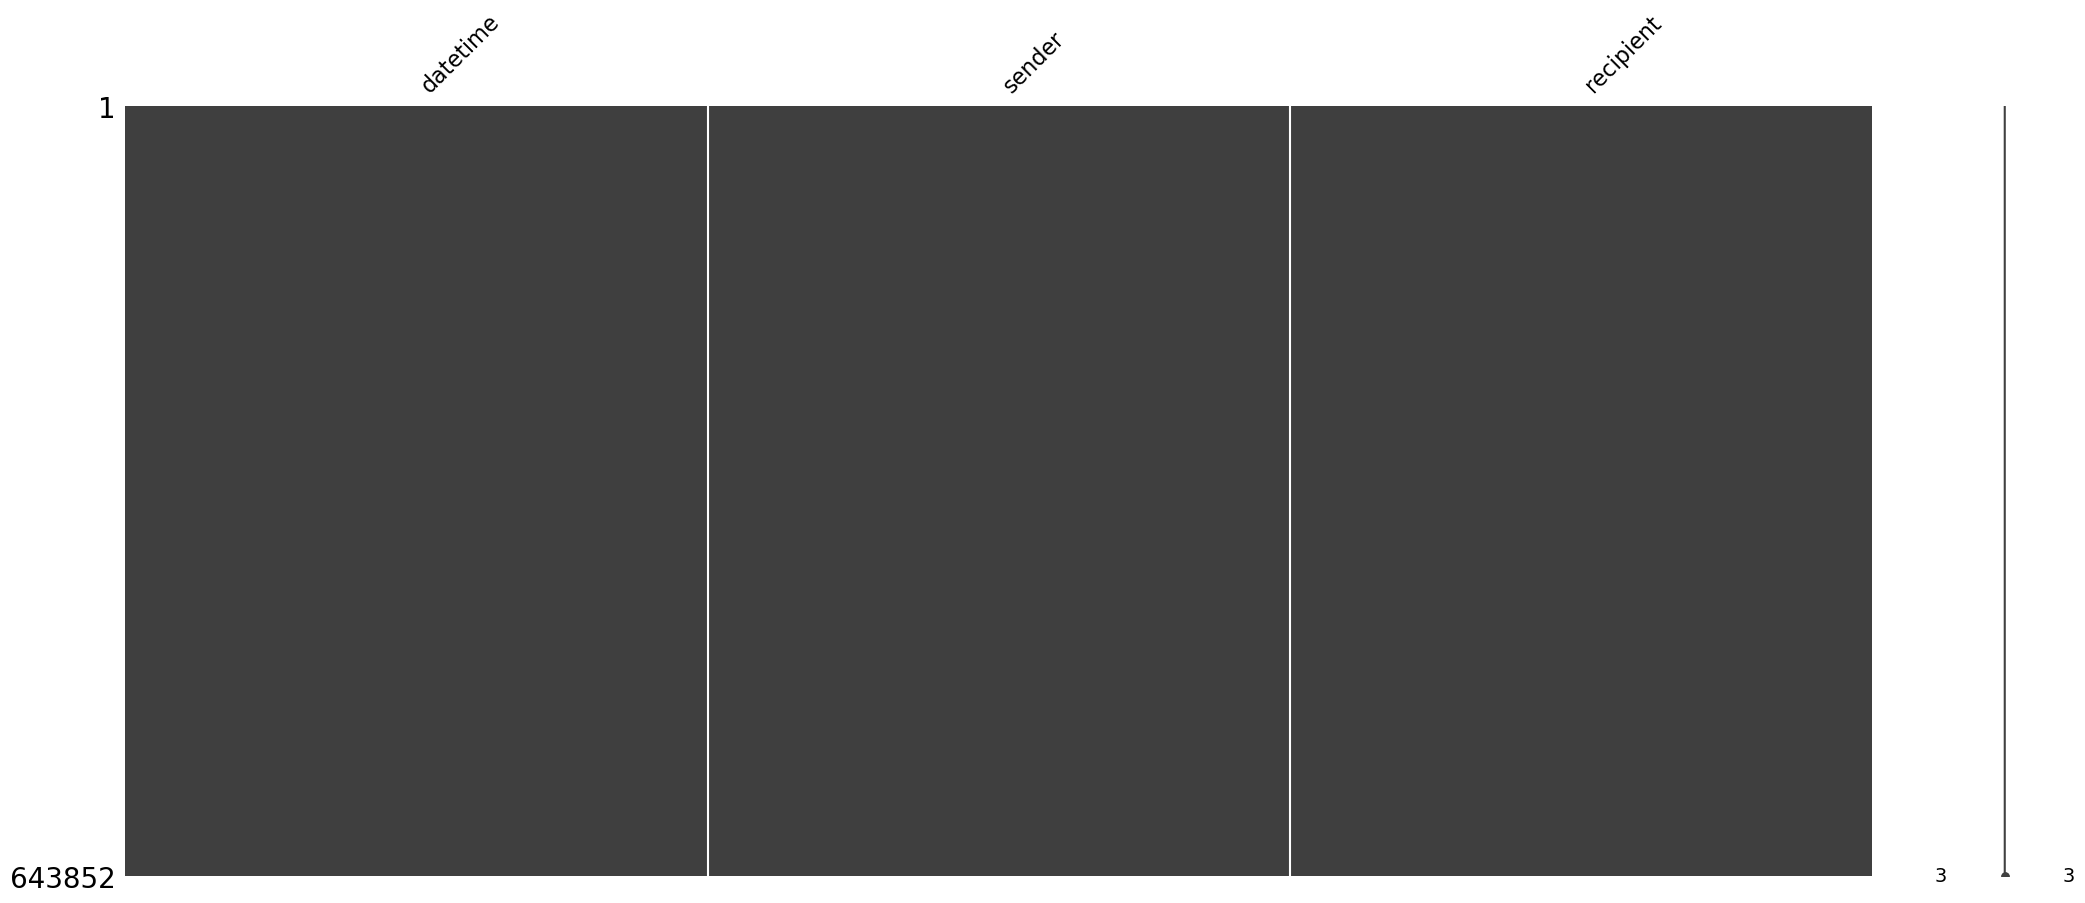

In [910]:
import missingno as msno

datasetList = [employee_data, login_data, usb_data, web_data, file_data, email_data]

for dataset in datasetList:
    print(dataset.isnull().sum())
    msno.matrix(dataset)

The visualisation and isnull() check confirms that the data includes no missing values, I will now check the data for any duplicate values.

In [912]:
for dataset in datasetList:
    print(dataset.duplicated().sum())

0
0
0
0
0
0


Now that I have confirmed the data has neither duplicates or null values I will quickly split the datetime values by hour, day, month and weekday in the dataframes that includes them. This is because it can help during further investigation to have easy access to more specific time-frames.

In [914]:
datasetWithDT = [login_data, usb_data, web_data, file_data, email_data]

for dataset in datasetWithDT:
    dataset['hour'] = dataset['datetime'].dt.hour
    dataset['day'] = dataset['datetime'].dt.day
    dataset['month'] = dataset['datetime'].dt.month
    dataset['weekday'] = dataset['datetime'].dt.weekday

I will also add a column with the role of the user a row relates to as this will also be helpful in providing additional context to my investigations. For the email data I will add the role of the sender and recipient in separate columns.

In [916]:
login_data = login_data.merge(employee_data[['user', 'role']], on='user', how='left')
usb_data = usb_data.merge(employee_data[['user', 'role']], on='user', how='left')
web_data = web_data.merge(employee_data[['user', 'role']], on='user', how='left')
file_data = file_data.merge(employee_data[['user', 'role']], on='user', how='left')

#email_data needs column for sender role and destination role
email_data = email_data.merge(employee_data[['email', 'role']], left_on='sender', right_on='email', how='left')
email_data.rename(columns={'role': 'senderrole'}, inplace=True)
email_data = email_data.merge(employee_data[['email', 'role']], left_on='recipient', right_on='email', how='left')
email_data.rename(columns={'role': 'receipientrole'}, inplace=True)
email_data.drop(['email_x','email_y'], axis=1, inplace=True)


In [917]:
login_data, usb_data, web_data, file_data, email_data

(                 datetime     user  action    pc  hour  day  month  weekday  \
 0     2018-01-01 00:21:56  usr-iea   login  pc63     0    1      1        0   
 1     2018-01-01 01:29:51  usr-dnm   login  pc95     1    1      1        0   
 2     2018-01-01 01:32:20  usr-nxa   login   pc9     1    1      1        0   
 3     2018-01-01 01:41:58  usr-pum   login   pc2     1    1      1        0   
 4     2018-01-01 01:46:17  usr-gtn   login  pc52     1    1      1        0   
 ...                   ...      ...     ...   ...   ...  ...    ...      ...   
 36195 2018-06-30 23:10:54  usr-dnm  logoff  pc95    23   30      6        5   
 36196 2018-06-30 23:13:54  usr-ayg  logoff  pc28    23   30      6        5   
 36197 2018-06-30 23:39:37  usr-ywt  logoff  pc66    23   30      6        5   
 36198 2018-06-30 23:52:53  usr-tss  logoff  pc26    23   30      6        5   
 36199 2018-06-30 23:53:44  usr-dmr  logoff  pc74    23   30      6        5   
 
             role  
 0       Director 

Now that I have checked my data is clean I can start with applying some visualisations to the datasets. At this stage I am mainly performing exploratory visualisation as I am trying to get a clearer picture of the data and hoping it points to any anomalous activity. For this I am going to focus on one dataset at a time, applying a score to each user depending on their suspicious actions before moving towards examining specific users to identify potential suspects.

In [919]:
#user_scores dictionary will be username as key and score as value
user_scores = {}

for user in user_set['Security']:
    user_scores[user] = 0
for user in user_set['Services']:
    user_scores[user] = 0
for user in user_set['HR']:
    user_scores[user] = 0
for user in user_set['Finance']:
    user_scores[user] = 0
for user in user_set['Legal']:
    user_scores[user] = 0
for user in user_set['Director']:
    user_scores[user] = 0
for user in user_set['Technical']:
    user_scores[user] = 0

user_scores

{'usr-esz': 0,
 'usr-idp': 0,
 'usr-pum': 0,
 'usr-mnt': 0,
 'usr-xjd': 0,
 'usr-jsp': 0,
 'usr-qms': 0,
 'usr-phx': 0,
 'usr-wyv': 0,
 'usr-yfq': 0,
 'usr-bjw': 0,
 'usr-amz': 0,
 'usr-ota': 0,
 'usr-czr': 0,
 'usr-aoa': 0,
 'usr-gtn': 0,
 'usr-mvs': 0,
 'usr-sof': 0,
 'usr-kzs': 0,
 'usr-vrp': 0,
 'usr-rhc': 0,
 'usr-rgi': 0,
 'usr-esr': 0,
 'usr-cnd': 0,
 'usr-dnm': 0,
 'usr-dpa': 0,
 'usr-zhs': 0,
 'usr-xwq': 0,
 'usr-slo': 0,
 'usr-vrt': 0,
 'usr-jeg': 0,
 'usr-bsg': 0,
 'usr-tyw': 0,
 'usr-tsz': 0,
 'usr-cil': 0,
 'usr-awo': 0,
 'usr-lhv': 0,
 'usr-rud': 0,
 'usr-nqv': 0,
 'usr-ffq': 0,
 'usr-knz': 0,
 'usr-mja': 0,
 'usr-kng': 0,
 'usr-cef': 0,
 'usr-kdj': 0,
 'usr-csr': 0,
 'usr-zbg': 0,
 'usr-fvh': 0,
 'usr-rjr': 0,
 'usr-pkd': 0,
 'usr-kaa': 0,
 'usr-lpx': 0,
 'usr-xqz': 0,
 'usr-lnl': 0,
 'usr-ibv': 0,
 'usr-ihi': 0,
 'usr-vun': 0,
 'usr-mgl': 0,
 'usr-kbn': 0,
 'usr-idz': 0,
 'usr-snf': 0,
 'usr-kba': 0,
 'usr-ram': 0,
 'usr-rtz': 0,
 'usr-ufr': 0,
 'usr-fvi': 0,
 'usr-huz'

<strong>Exploring login_data</strong>

I am first going to get an idea of the distributions of both logins and logoffs by hour, day, month and weekday to help spot any suspicious activity out of the hours you might expect employees to work.

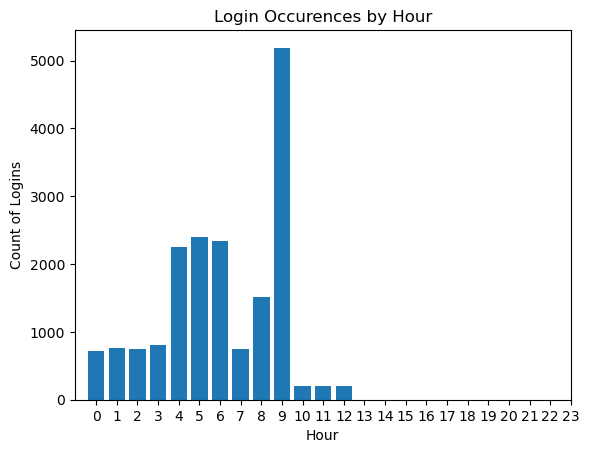

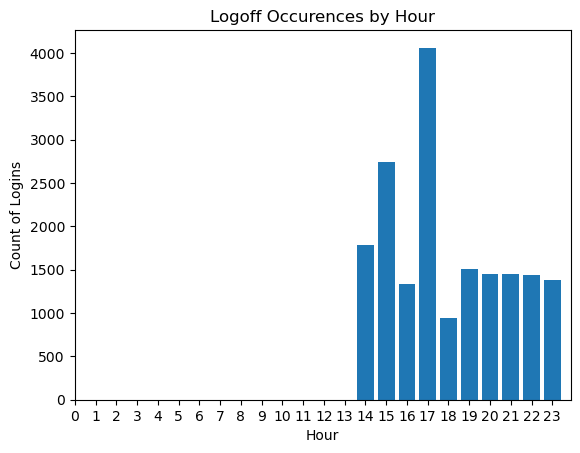

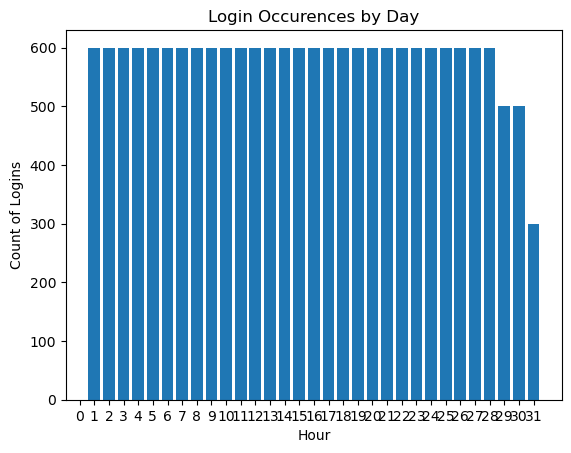

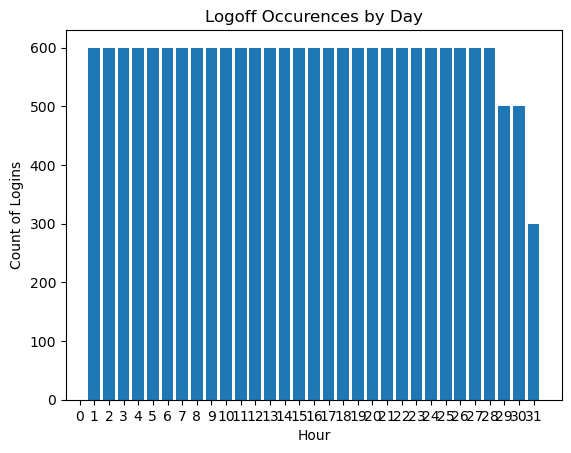

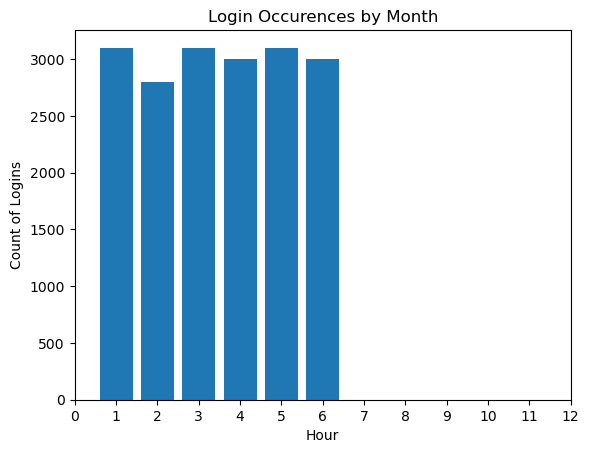

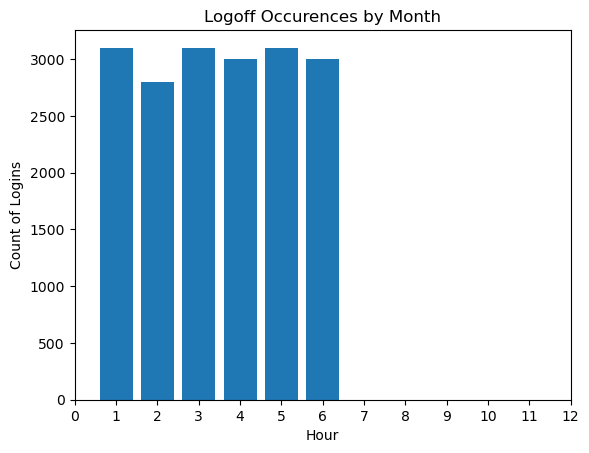

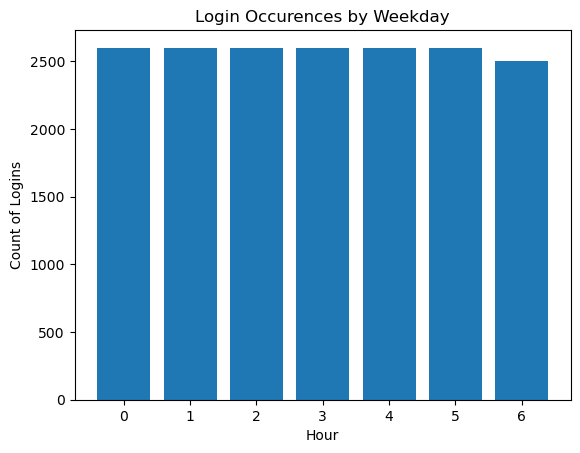

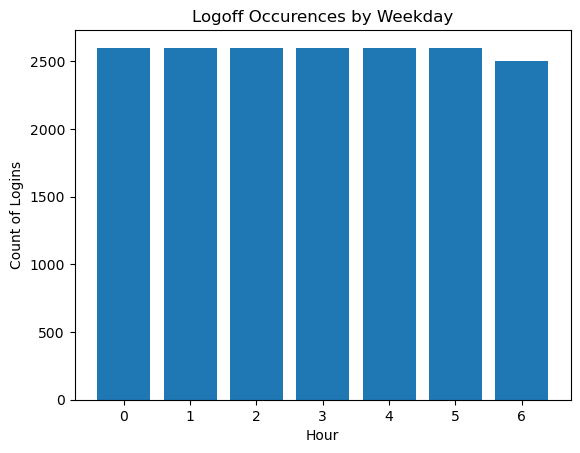

In [921]:
login_data_explore = login_data.copy()

login_only_hour = login_data_explore[login_data_explore['action']=='login'].groupby('hour').count().reset_index()
logoff_only_hour = login_data_explore[login_data_explore['action']=='logoff'].groupby('hour').count().reset_index()
login_only_day = login_data_explore[login_data_explore['action']=='login'].groupby('day').count().reset_index()
logoff_only_day = login_data_explore[login_data_explore['action']=='logoff'].groupby('day').count().reset_index()
login_only_month = login_data_explore[login_data_explore['action']=='login'].groupby('month').count().reset_index()
logoff_only_month = login_data_explore[login_data_explore['action']=='logoff'].groupby('month').count().reset_index()
login_only_weekday = login_data_explore[login_data_explore['action']=='login'].groupby('weekday').count().reset_index()
logoff_only_weekday = login_data_explore[login_data_explore['action']=='logoff'].groupby('weekday').count().reset_index()


plt.bar(login_only_hour['hour'], login_only_hour['action'])
plt.title("Login Occurences by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(24))
plt.show()

plt.bar(logoff_only_hour['hour'], logoff_only_hour['action'])
plt.title("Logoff Occurences by Hour")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(24))
plt.show()

plt.bar(login_only_day['day'], login_only_day['action'])
plt.title("Login Occurences by Day")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(32))
plt.show()

plt.bar(logoff_only_day['day'], logoff_only_day['action'])
plt.title("Logoff Occurences by Day")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(32))
plt.show()

plt.bar(login_only_month['month'], login_only_month['action'])
plt.title("Login Occurences by Month")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(13))
plt.show()

plt.bar(logoff_only_month['month'], logoff_only_month['action'])
plt.title("Logoff Occurences by Month")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(13))
plt.show()

plt.bar(login_only_weekday['weekday'], login_only_weekday['action'])
plt.title("Login Occurences by Weekday")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(7))
plt.show()

plt.bar(logoff_only_weekday['weekday'], logoff_only_weekday['action'])
plt.title("Logoff Occurences by Weekday")
plt.xlabel("Hour")
plt.ylabel("Count of Logins")
plt.xticks(range(7))
plt.show()

After checking these visualisations the activity that appears most suspicious to me are the logins at very early hours in the morning (0:00-3:00) and logoffs late at night (22:00-23:00), I will add 1 point to the scores for any users logging in/off at these times and an extra point for users who have done so more than 100 times. A further point to note is that login and logoff appears to be equal which helps to rule out people forgetting to logoff and allowing somebody to access their files/data/level of authorisation.

In [923]:
#GET USERS MOST FREQUENTLY LOGGING IN/OFF BETWEEEN 22:00-3:00
#Filter by hours
suspicious_loginlogoff = login_data[(login_data['hour'] >= 0) & (login_data['hour'] <= 3) | (login_data['hour'] >= 22) & (login_data['hour'] <= 23)]
suspicious_loginlogoff_counts = suspicious_loginlogoff['user'].value_counts().reset_index()
#List including all users at suspicious hours
normal_list = suspicious_loginlogoff_counts['user'].unique()
suspicious_loginlogoff_counts = suspicious_loginlogoff_counts[suspicious_loginlogoff_counts['count'] > 100]
#List only including the users > 100 count
over100_list = suspicious_loginlogoff_counts['user'].unique()


#Adding 2 to the users who have logging-in/off over 100 times at suspicious hours
for user in normal_list:
    user_scores[user] += 1
for user in over100_list:
    user_scores[user] += 1

The login_data also allows us to check if users are using their expected PC by cross-referencing the PC column with the PC column in employee_data, if a user isn't using their expected PC potential threats could be accessing files they are unauthorised to access or even installing malicious files. If a user is doing this across multiple PCs they could be slowly building up for a much larger attack.

In [925]:
#Create expected PC column
different_PC_users = login_data.merge(employee_data[['user', 'pc']], on='user', how='left', suffixes=('', 'expected'))
#Filter by expected PC != PC
different_PC_users = different_PC_users[different_PC_users['pc'] != different_PC_users['pcexpected']]

print(different_PC_users['user'].unique())

[]


Luckily this query has returned no users, however, it is good to rule it out as a potential threat. Having got some overview of login_data I will move towards USB data

<strong>Exploring usb_data</strong>

I might first check whether for every usb_insert there is a usb_remove, extending that I will get the count of usb_insert/remove by user and visualise this including their role.

In [928]:
#Get total count of usb_insert and usb_remove
usb_insert_remove_count = usb_data['action'].value_counts().reset_index()
usb_insert_remove_count

,action,count
0,usb_insert,34024
1,usb_remove,34024


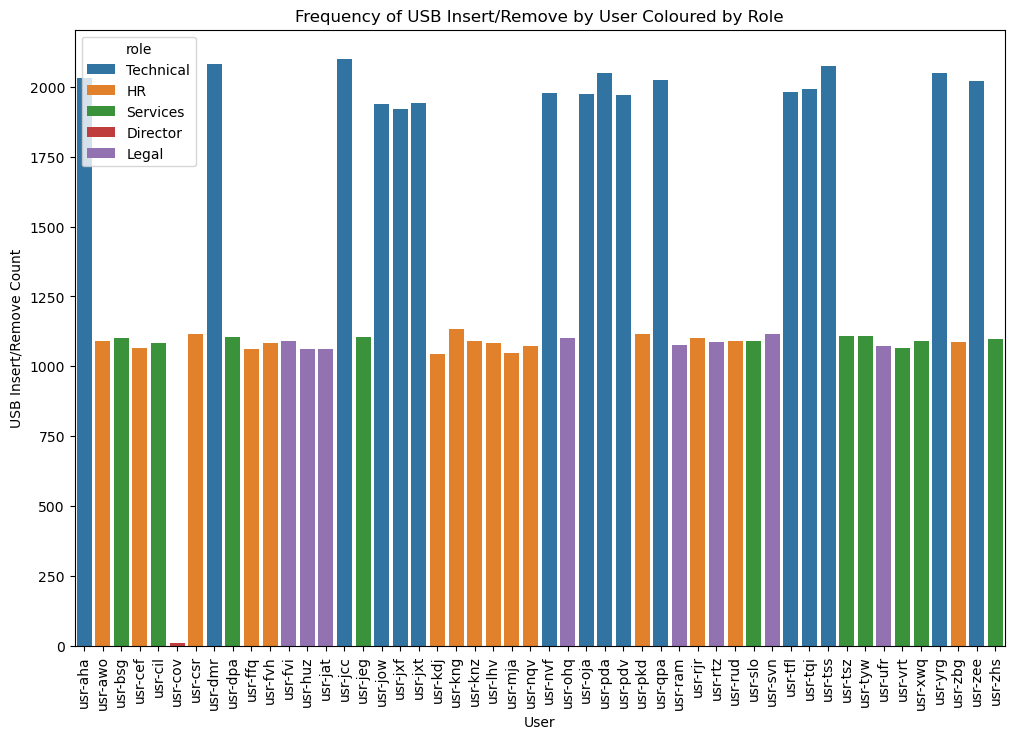

In [929]:
#Get count of usb_insert/remove by user
user_insert_remove_count = usb_data.groupby(['user','role']).size().reset_index(name="actioncount")


plt.figure(figsize=(12, 8))
sns.barplot(x='user', y='actioncount', hue='role', data=user_insert_remove_count)
#Makes x-axis labels more readable
plt.xticks(rotation=90)
plt.xlabel('User')
plt.ylabel('USB Insert/Remove Count')
plt.title('Frequency of USB Insert/Remove by User Coloured by Role')
plt.show()

This data hasn't returned anything super suspicious, it is expected for users in the technical role to have more usb actions and the rest of the usb actions are all similar based on the users role. There is one anomaly in usr-cov being the only director to have any usb actions, the main threat here would be the director role having high access authorisation and the potential of copying over sensitive data to a local machine. Because of this I will add 2 points to usr-cov's score.

In [931]:
user_scores['usr-cov'] += 2

In a similar fashion to login_data I will add a point to the score of users who have used a USB at suspicious hours as users could be unsupervised and easily copy over malicious files.

In [933]:
usb_OOH = usb_data[(usb_data['hour'] >= 0) & (usb_data['hour'] <= 3) | (usb_data['hour'] >= 22) & (usb_data['hour'] <= 23)].groupby(['user']).size().reset_index(name="actioncount")
usb_OOH_users = usb_OOH['user'].unique()

for user in usb_OOH_users:
    user_scores[user] += 1

<strong>Exploring web_data</strong>

To begin I will visualse the websites users are visiting and the frequency by role.

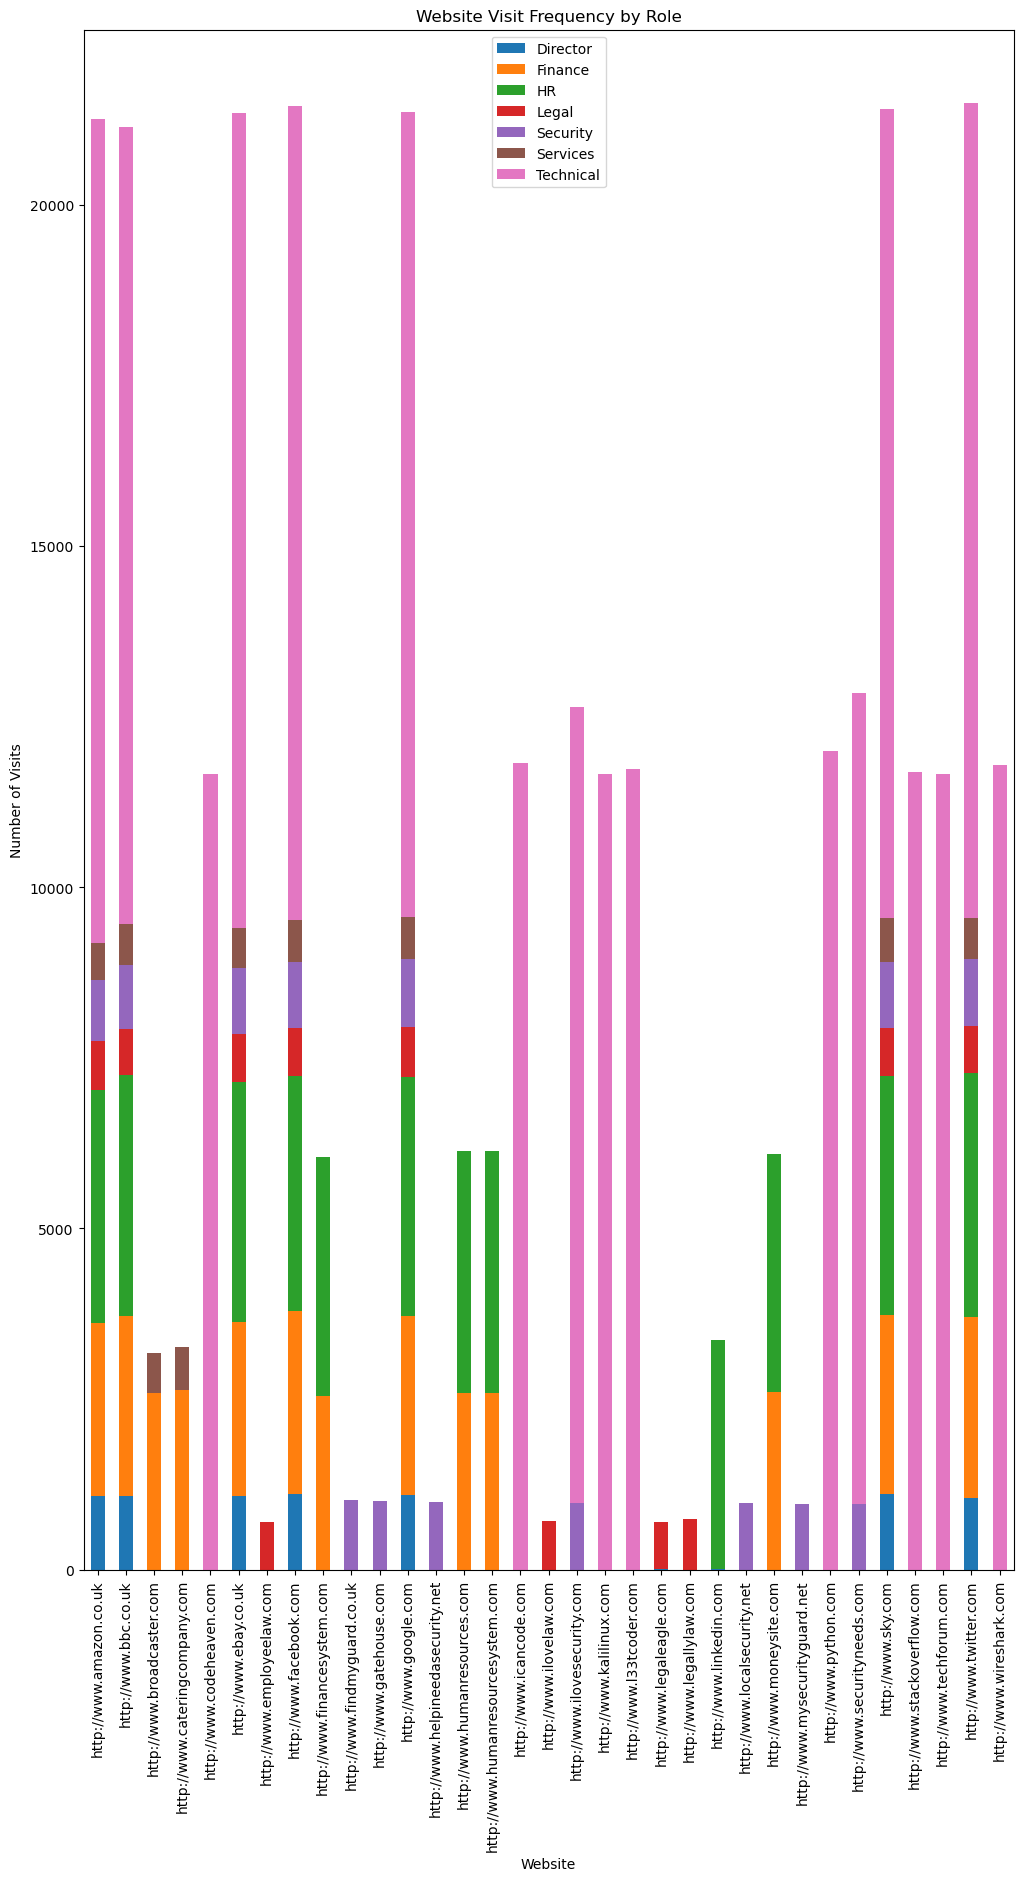

In [971]:
#Get website visits by role
visit_role_counts = web_data.groupby(['website', 'role']).size().reset_index(name='visitcount')
visit_role_counts = visit_role_counts.pivot(index='website', columns='role', values='visitcount').fillna(0)
#Plots stacked bar chart
visit_role_counts.plot(kind='bar', stacked=True, figsize=(12, 20))

plt.title('Website Visit Frequency by Role')
plt.xlabel('Website')
plt.ylabel('Number of Visits')
plt.xticks(rotation=90)
plt.legend()

plt.show()

Because there are so many websites an interactive visualisation could help, I opted for a Sunburst Chart as it makes it easy to get a breakdown of sites visited by role.

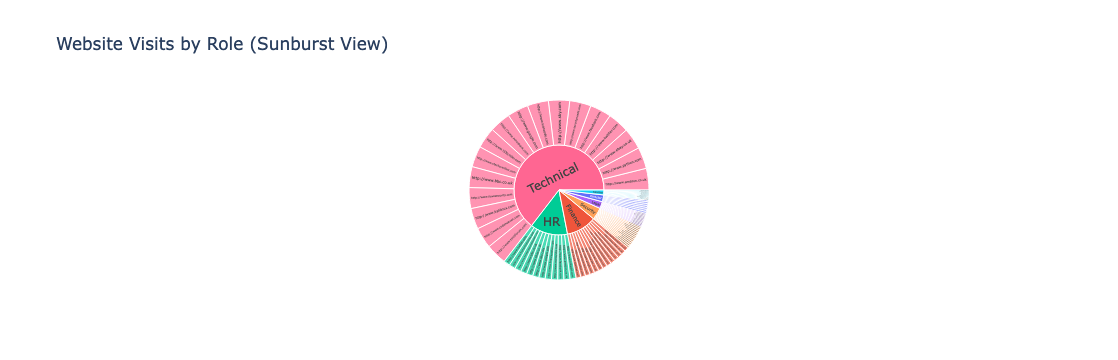

In [953]:
import plotly.express as px

visit_role_counts = web_data.groupby(['website', 'role']).size().reset_index(name='visitcount')
fig = px.sunburst(visit_role_counts, path=['role', 'website'], values='visitcount', color='role',
                  title="Website Visits by Role (Sunburst View)")
fig.show()

I will also plot the websites visited by role on separate bar charts for added clarity.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


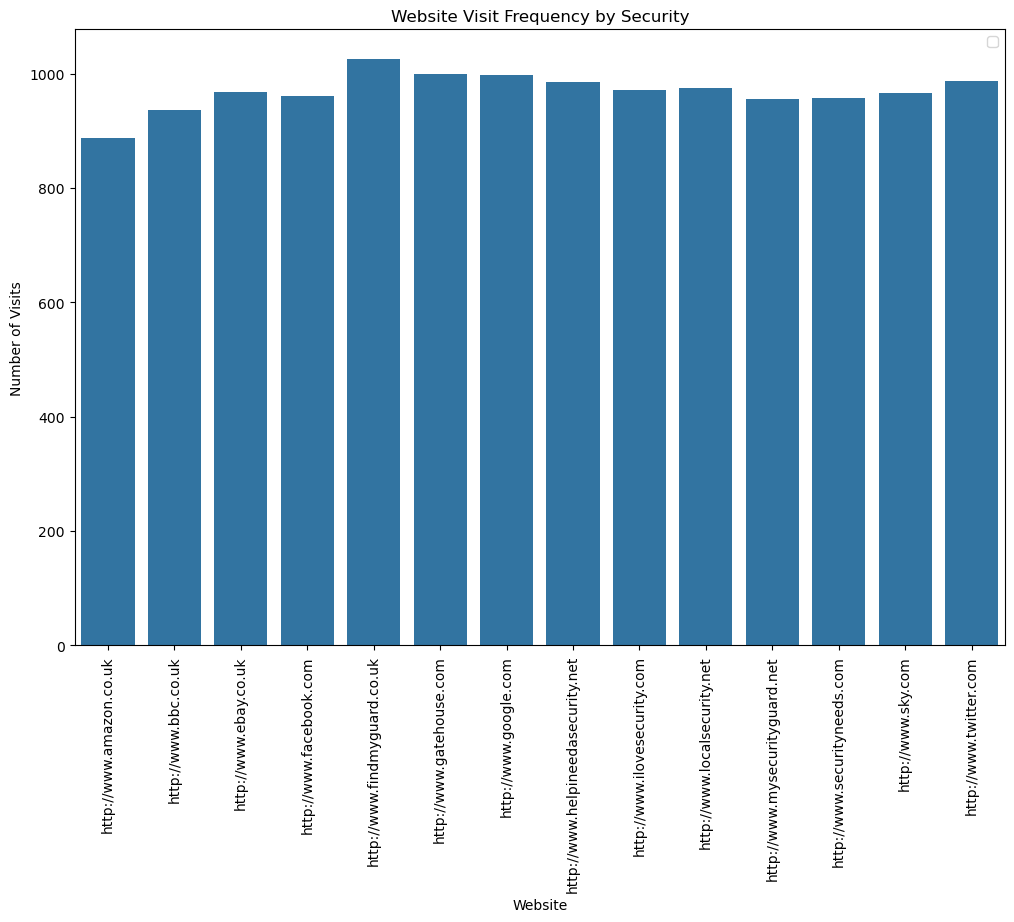

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


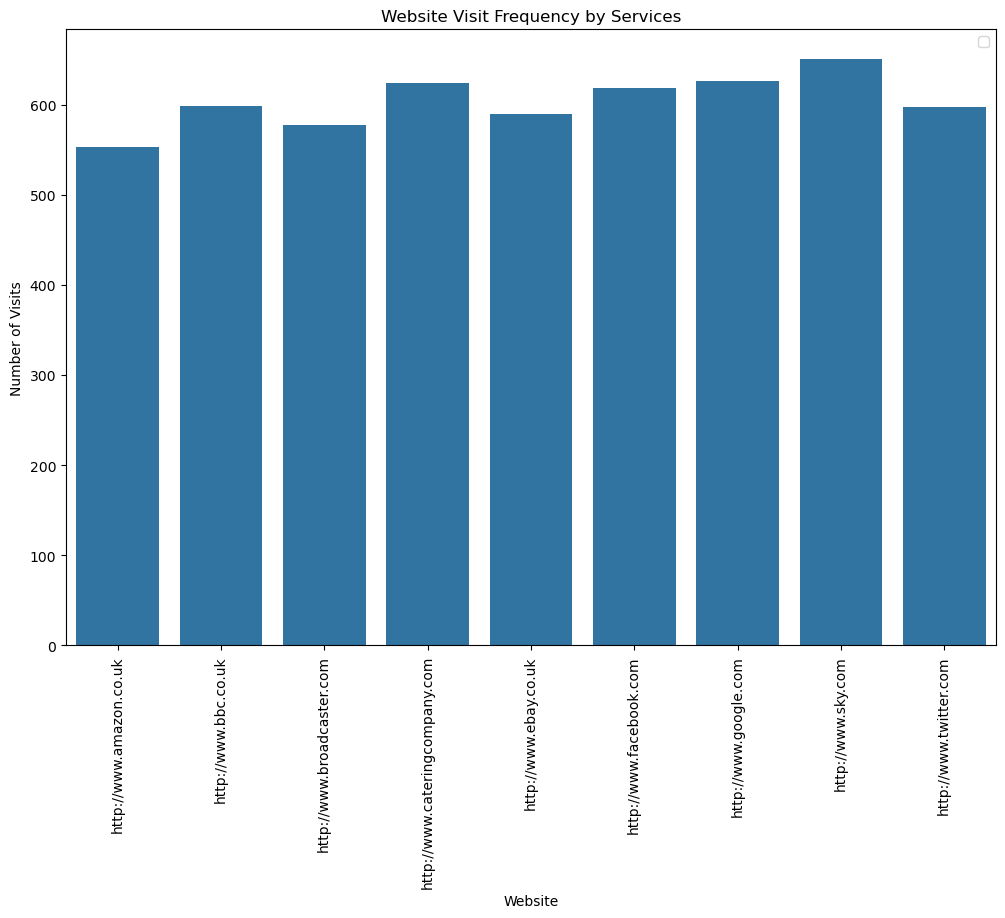

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


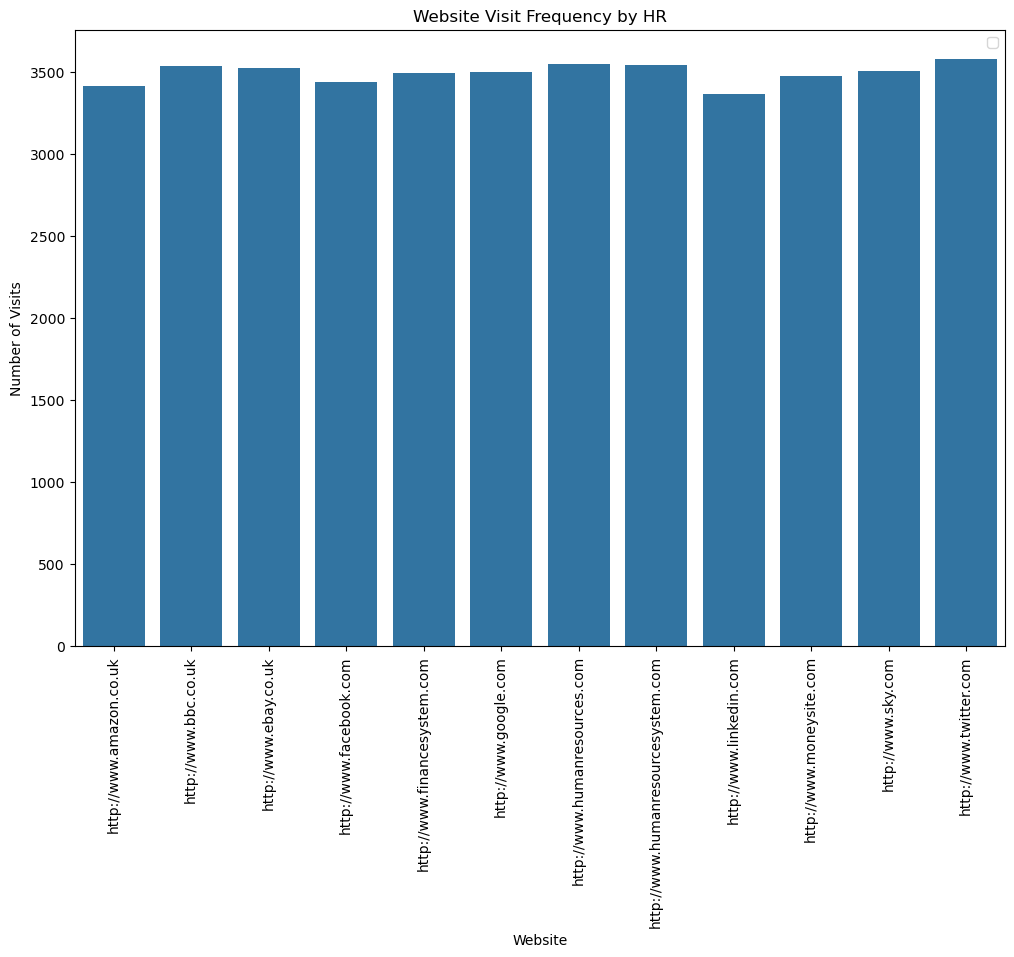

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


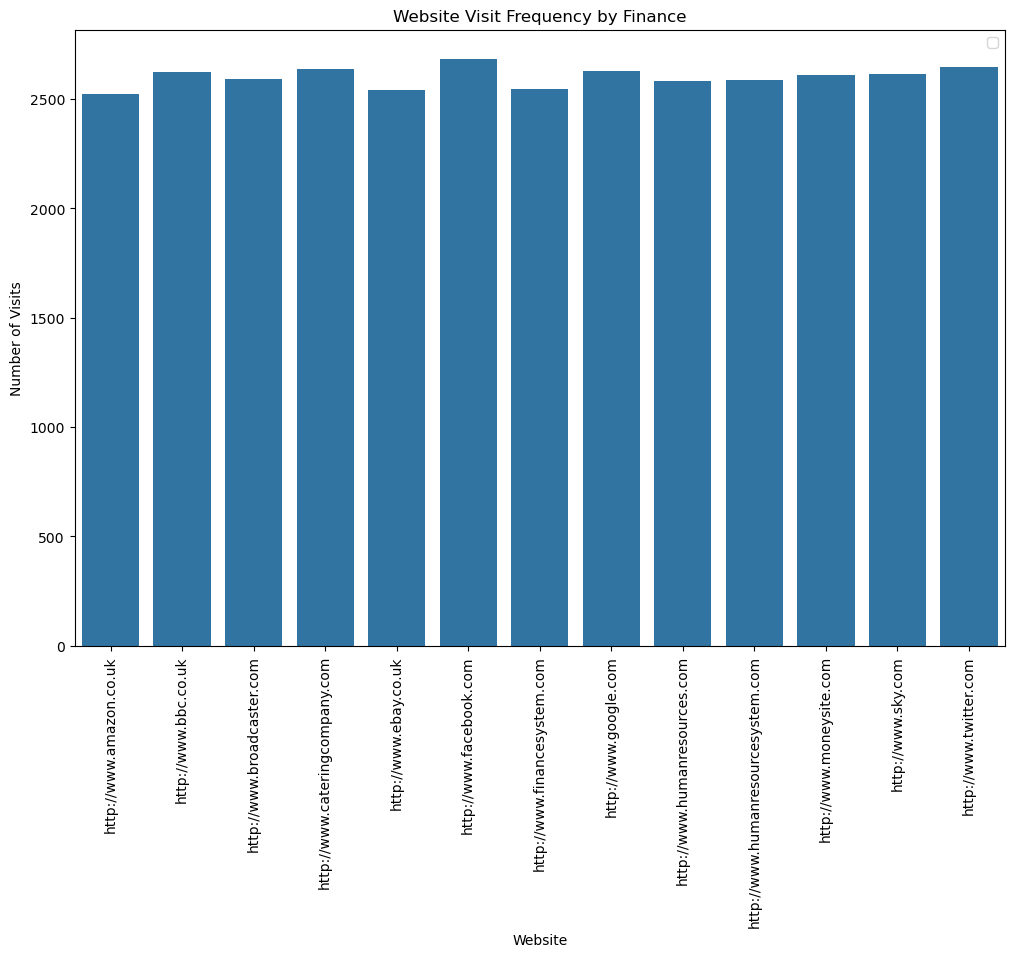

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


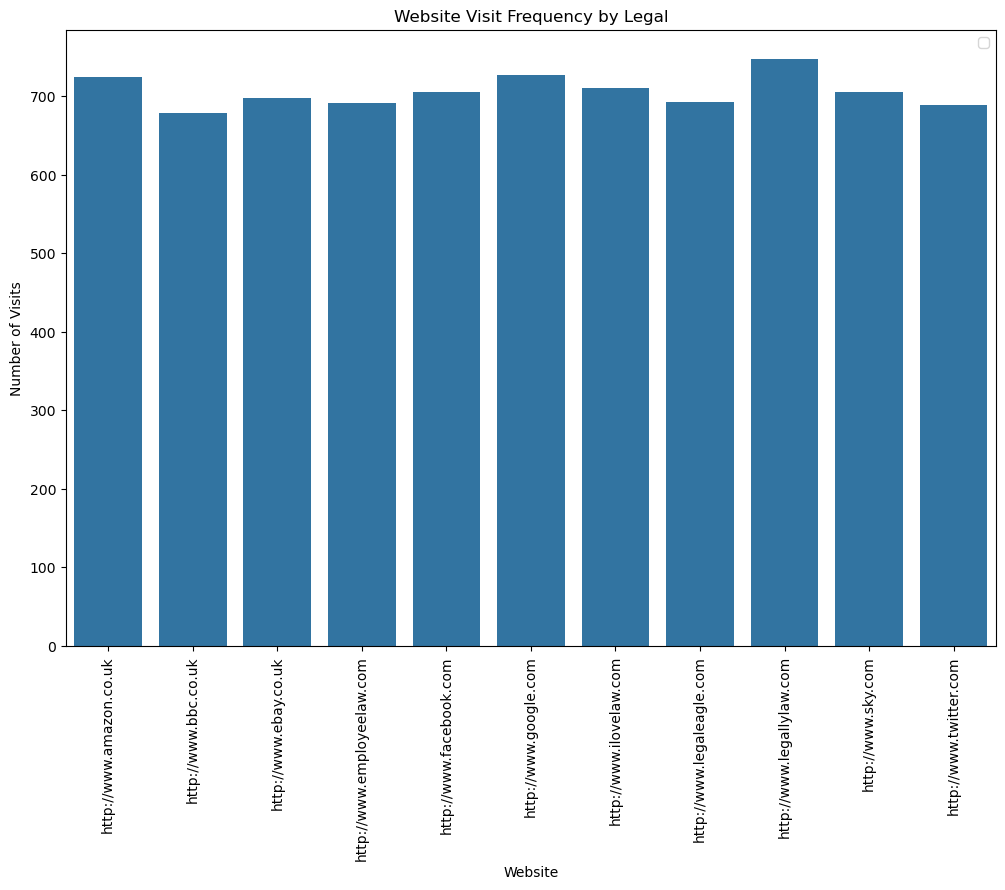

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


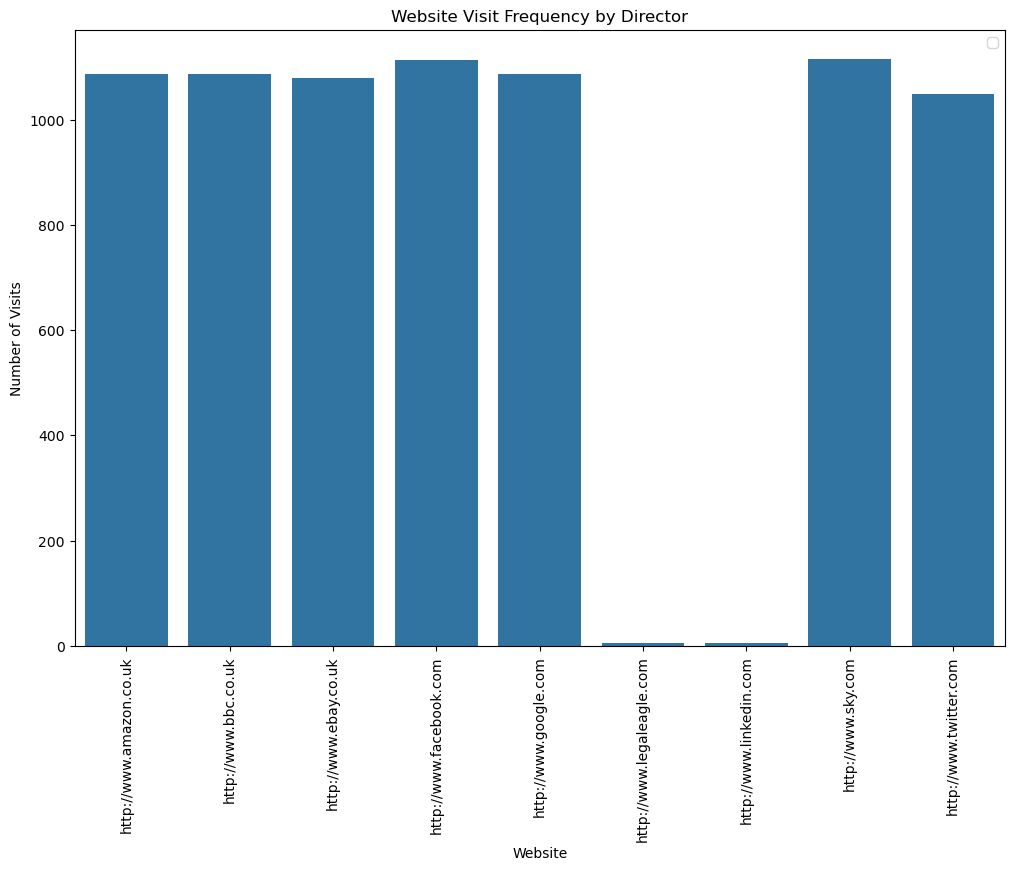

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


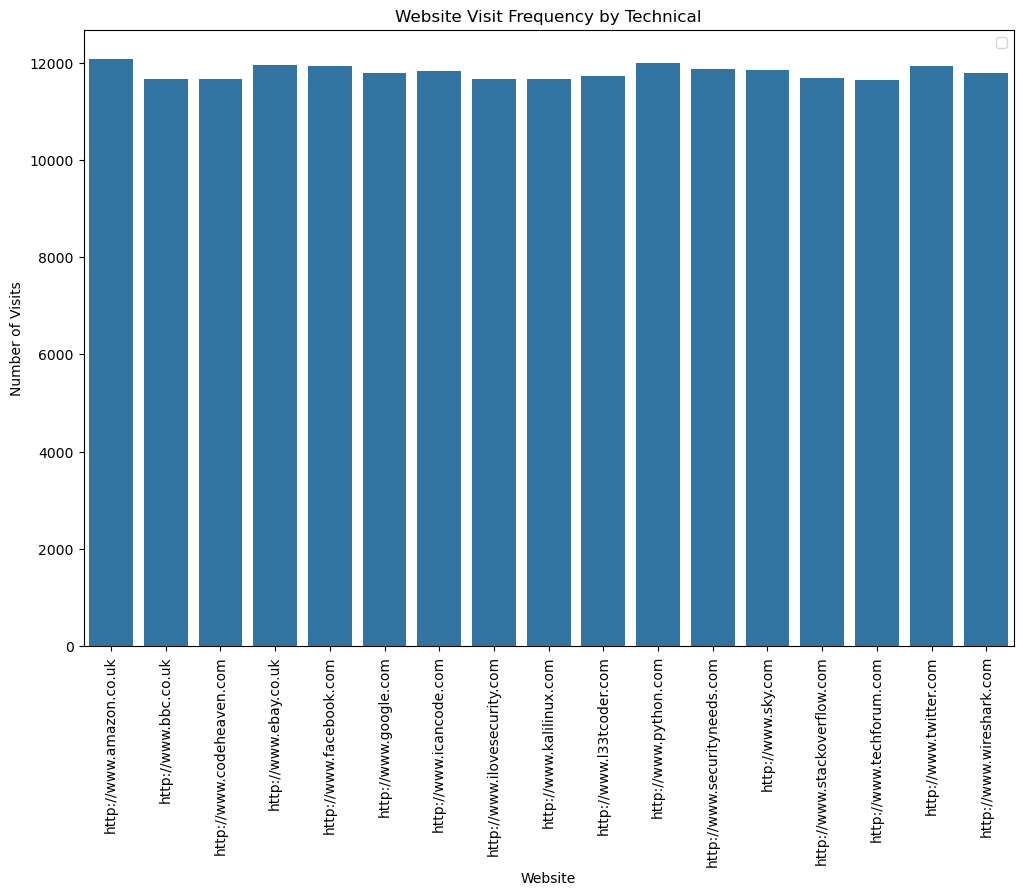

In [986]:
role_list = ['Security','Services','HR','Finance','Legal','Director','Technical']
visit_role_counts = web_data.groupby(['website', 'role']).size().reset_index(name='visitcount')


for role in role_list:
    plt.figure(figsize=(12, 8))
    sns.barplot(x='website', y='visitcount', data=visit_role_counts[visit_role_counts['role'] == role])
    plt.title('Website Visit Frequency by '+ role)
    plt.xlabel('Website')
    plt.ylabel('Number of Visits')
    plt.xticks(rotation=90)
    plt.legend()
    
    plt.show()


The visualisation by each role reveals a very obvious anomaly in an otherwise unsuspicious set of data, there are two websites visited by the director role at a far lower frequency than the rest "www.legaleagle.com" and "www.linkedin.com", this could be concerning as it suggests the user is looking for legal advice outside of the legal department and is looking for a new job by browsing a job networking site.

In [999]:
#Find the director who has accessed these websites
suspicious_web_data = web_data[(web_data['role'] == 'Director') & ((web_data['website'] == 'http://www.linkedin.com') | (web_data['website'] == 'http://www.legaleagle.com'))]
#Add 2 points to his score
suspicious_web_user = suspicious_web_data['user'].unique()
user_scores[suspicious_web_user[0]] += 2

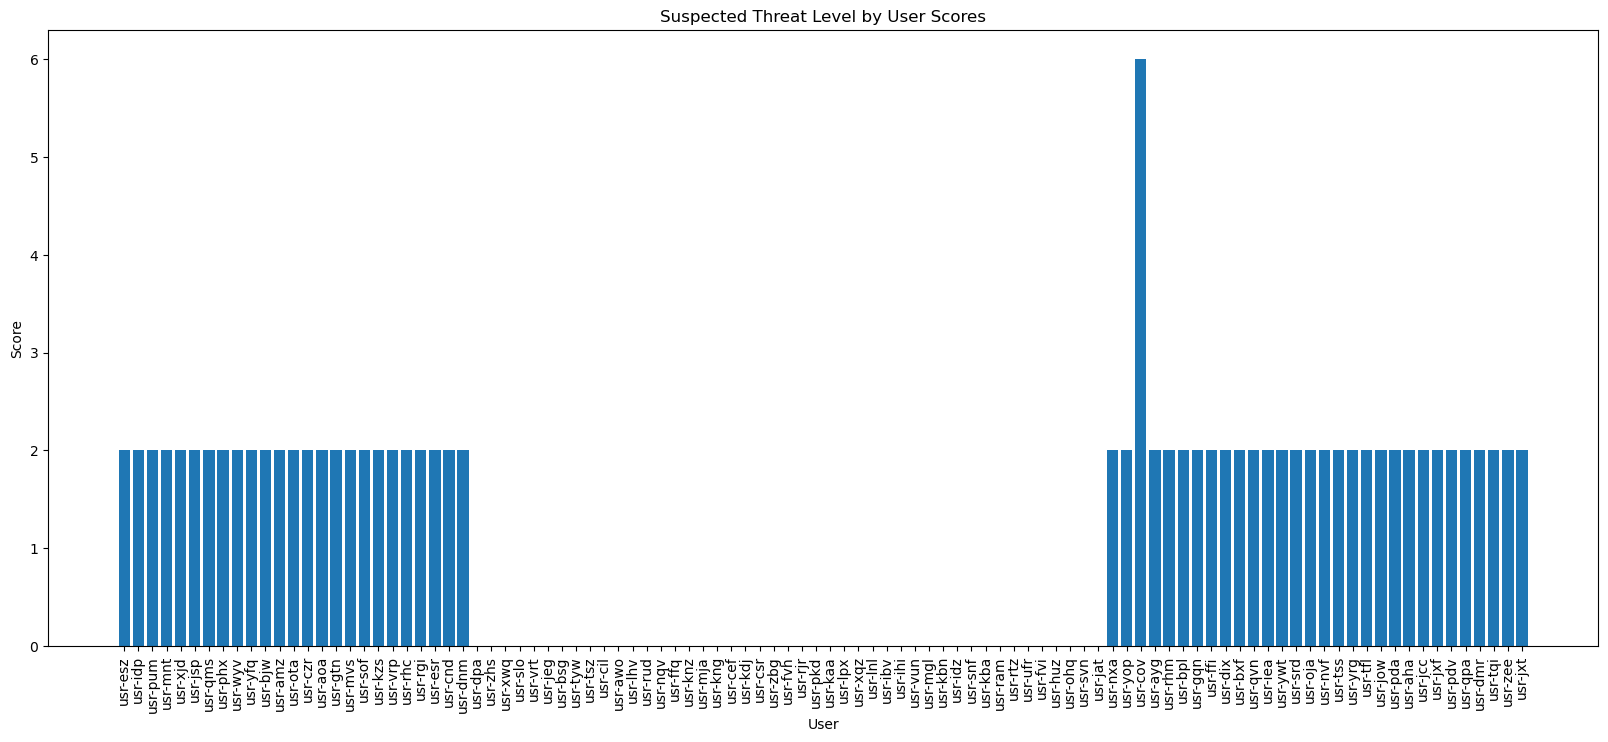

In [1001]:
#Visualise user scores
keys = list(user_scores.keys())
values = list(user_scores.values())

user_scores_df = pd.DataFrame({
    "user": keys,
    "score": values
})

plt.figure(figsize=(20, 8))
plt.bar(user_scores_df['user'], user_scores_df['score'])
plt.title("Suspected Threat Level by User Scores")
plt.xlabel("User")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()

### Question 7: Describe what you believe are the key findings of your investigation. You should clearly state the suspect identified, and the sequential order of suspicious events, including the date and time that these occurred. You should then provide your own critical reflection of what has occurred in this scenario, giving justification for any assumptions made. Limit your response to a maximum of 400 words. 

Please make clear which dataset you have used for your investigation.

#### (10 marks)